In [1]:
#Q1
import numpy as np
import pandas as pd

#read file
rankings = pd.read_csv('ratings.csv')

#----------- check on the formula of sparsity
n_users = rankings.userId.unique().shape[0]
n_items = rankings.movieId.unique().shape[0]
print (len(rankings))
sparsity = len(rankings) / (n_items * n_users)
print (sparsity)
#--------------


100004
0.016439141608663475


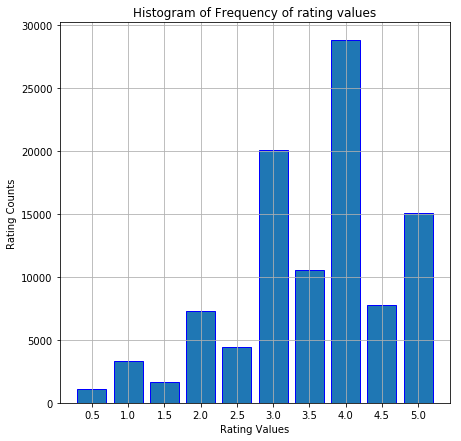

In [2]:
#Q2
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

bin_edges = np.arange(0.25,5.5,0.5)

_ = plt.hist(rankings['rating'],bins = bin_edges,edgecolor="b",rwidth=0.8)
_ = plt.title('Histogram of Frequency of rating values')
_ = plt.xlabel('Rating Values')
_ = plt.ylabel('Rating Counts')
_ = plt.grid('True')

plt.xticks(np.arange(0.5,5.5,0.5))
plt.show()

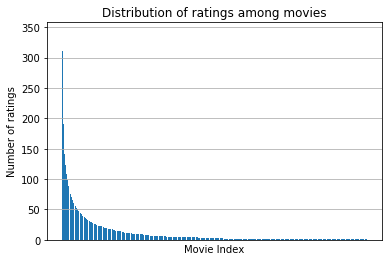

In [3]:
#Q3 - Distribution of ratings among movies

from collections import Counter
plt.title('Distribution of ratings among movies')
plt.xlabel('Movie Index')
plt.ylabel('Number of ratings')
plt.grid('True')

# Sort movie ratings in decreasing order of ratings
ctr_movieratings = Counter(rankings['movieId'])
plt.xticks([], [])
plt.bar(np.arange(n_items),sorted(ctr_movieratings.values(),reverse = True))


plt.show()

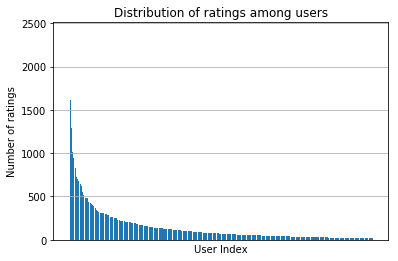

In [4]:
#Q3 -- Distribution of ratings among users

plt.title('Distribution of ratings among users')
plt.xlabel('User Index')
plt.ylabel('Number of ratings')
plt.grid('True')

# Sort user ratings in decreasing order of ratings
ctr_userratings = Counter(rankings['userId'])
plt.xticks([], [])
plt.bar(np.arange(n_users),sorted(ctr_userratings.values(),reverse = True))


plt.show()


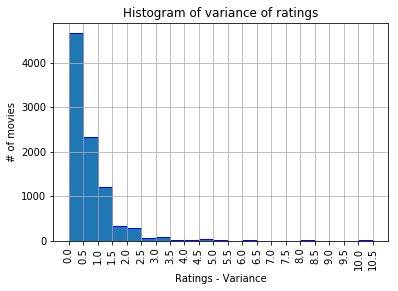

In [5]:
#Q6
# there are two ways of calculating the variance 
#   - 1. direct as central 2nd order moment (https://en.wikipedia.org/wiki/Moment_(mathematics))divided by the length of the vector
#   - 2. "mean of square minus square of mean" (see https://en.wikipedia.org/wiki/Variance)

plt.xlabel('Ratings - Variance')
plt.ylabel('# of movies')
plt.grid('true')
plt.title('Histogram of variance of ratings')
bins = np.arange(0,11,0.5)

rate_var = rankings.groupby('movieId')['rating'].var().fillna(0).tolist()
plt.hist(rate_var, bins = bins ,edgecolor="b")

plt.xticks(np.arange(0,11,0.5),rotation="vertical")

plt.show()

In [6]:
#q10
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
from surprise import Dataset
from surprise import Reader
import pandas as pd

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

#sweepking k from 2 to 100 by increments of 2
range = range(2,102,2)

rmse, mae = [], []
for k in range:
    pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    results = cross_validate(pearson, mydataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    rmse.append(np.mean(results['test_rmse']))
    mae.append(np.mean(results['test_mae']))
    


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

 average RMSE is 0.917192 for k = 35
 average MAE is 0.698756 for k = 30


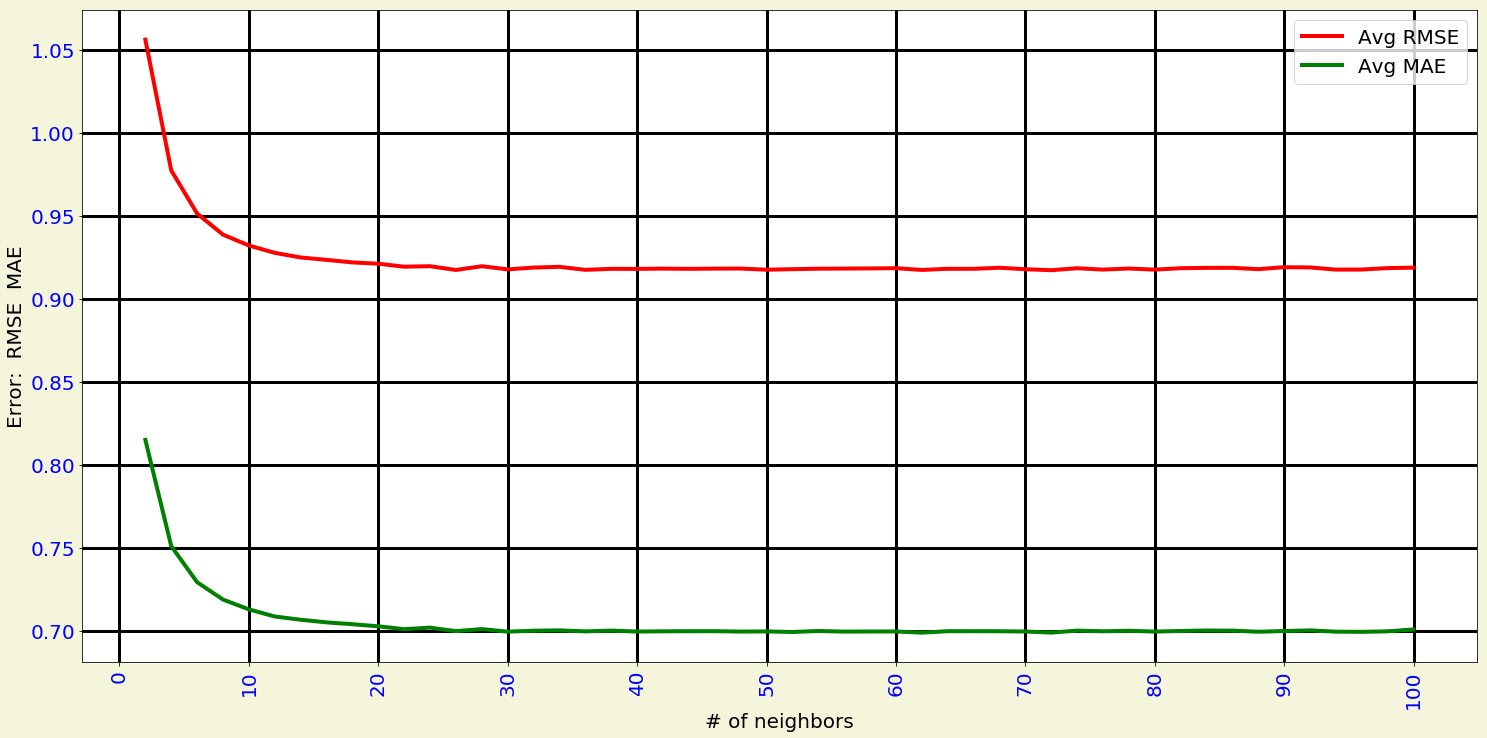

In [7]:
#plot question 10 and find question 11 by observation
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(25,12),facecolor = 'beige')

print(' average RMSE is %f for k = %d' %(np.min(rmse),np.argmin(rmse)))
print(' average MAE is %f for k = %d' %(np.min(mae),np.argmin(mae)))

plt.plot(range, rmse, label = "Avg RMSE",color = 'red',lw = 4)
plt.plot(range, mae, label = "Avg MAE",color = 'green',lw = 4)
plt.xlabel('# of neighbors',fontsize=20)
plt.ylabel('Error:  RMSE  MAE',fontsize=20)
plt.grid('true', lw=3,color='black')
plt.legend(fontsize=20)
#plt.xticks(k_range,rotation="vertical",fontsize=18) np.arange(0,11,0.5)
plt.xticks(np.arange(0,102,10),fontsize=20,rotation="vertical",color='blue')
plt.yticks(fontsize=20,color='blue')
plt.show()


In [8]:
#q12 predict ratings of popular movies
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import KNNWithMeans
import pandas as pd
from surprise import Reader
from surprise import Dataset
from collections import Counter

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def popmovies(mydataset):
    popmovies_counter = Counter([count[1] for count in mydataset])
    popmovies_dataset = [count for count in mydataset if popmovies_counter[count[1]] > 2]
    return popmovies_dataset

del range
#sweepking k from 2 to 100 by increments of 2
range = range(2,102,2)
err_rmse = []
crossval = KFold(n_splits=10)
for k in range:
    pop_pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    act_rmse = []
    for trainset, testset in crossval.split(mydataset):
        pop_pearson.fit(trainset)
        pop_movie_predictions = pop_pearson.test(popmovies(testset))
        act_rmse.append(accuracy.rmse(pop_movie_predictions, verbose=False))
    err_rmse.append(np.mean(act_rmse))


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

 average RMSE is 0.873748 for k = 17


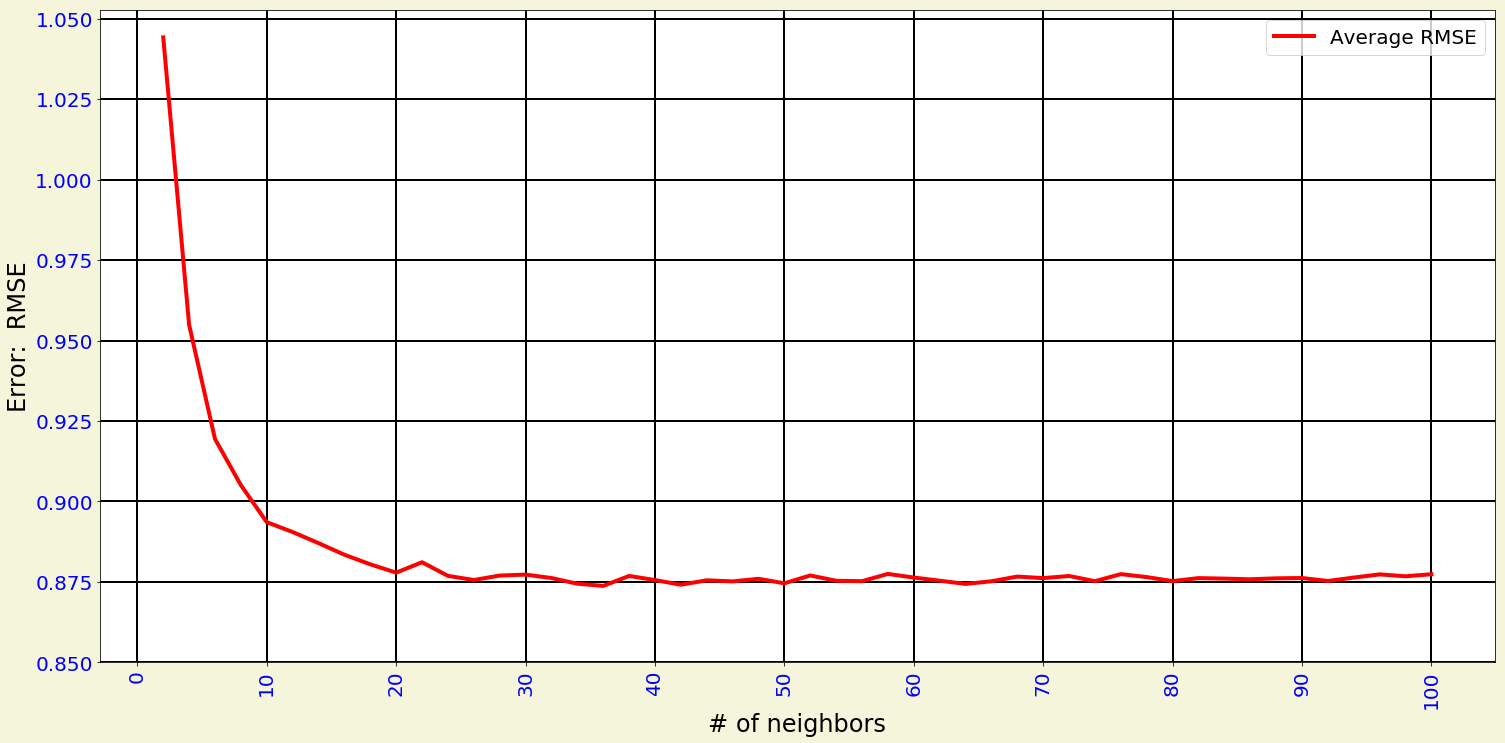

In [9]:
#plot question 12
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(25,12),facecolor = 'beige')
print(' average RMSE is %f for k = %d' %(np.min(err_rmse),np.argmin(err_rmse)))

plt.plot(range, err_rmse, label = "Average RMSE",color = 'red',lw = 4)
plt.xlabel('# of neighbors',fontsize=24)
plt.ylabel('Error:  RMSE',fontsize=24)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.legend(fontsize=20)
plt.xticks(np.arange(0,105,10),fontsize=20,rotation="vertical",color='blue')
plt.yticks(np.arange(0.850,1.050,0.025),fontsize=20,color='blue')
plt.show()


In [10]:
#q13 predict ratings of unpopular movies

from surprise.model_selection import KFold
from surprise import accuracy
from surprise import KNNWithMeans
import pandas as pd
from surprise import Reader
from surprise import Dataset
from collections import Counter

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def unpopmovies(mydataset):
    unpopmovies_counter = Counter([count[1] for count in mydataset])
    unpopmovies_dataset = [count for count in mydataset if unpopmovies_counter[count[1]] < 2]
    return unpopmovies_dataset

#sweepking k from 2 to 100 by increments of 2
del range
range = range(2,102,2)
err_rmse = []
crossval = KFold(n_splits=10)
for k in range:
    unpop_pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    act_rmse = []
    for trainset, testset in crossval.split(mydataset):
        unpop_pearson.fit(trainset)
        unpop_movie_predictions = unpop_pearson.test(unpopmovies(testset))
        act_rmse.append(accuracy.rmse(unpop_movie_predictions, verbose=False))
    err_rmse.append(np.mean(act_rmse))


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

 average RMSE is 1.039964 for k = 38


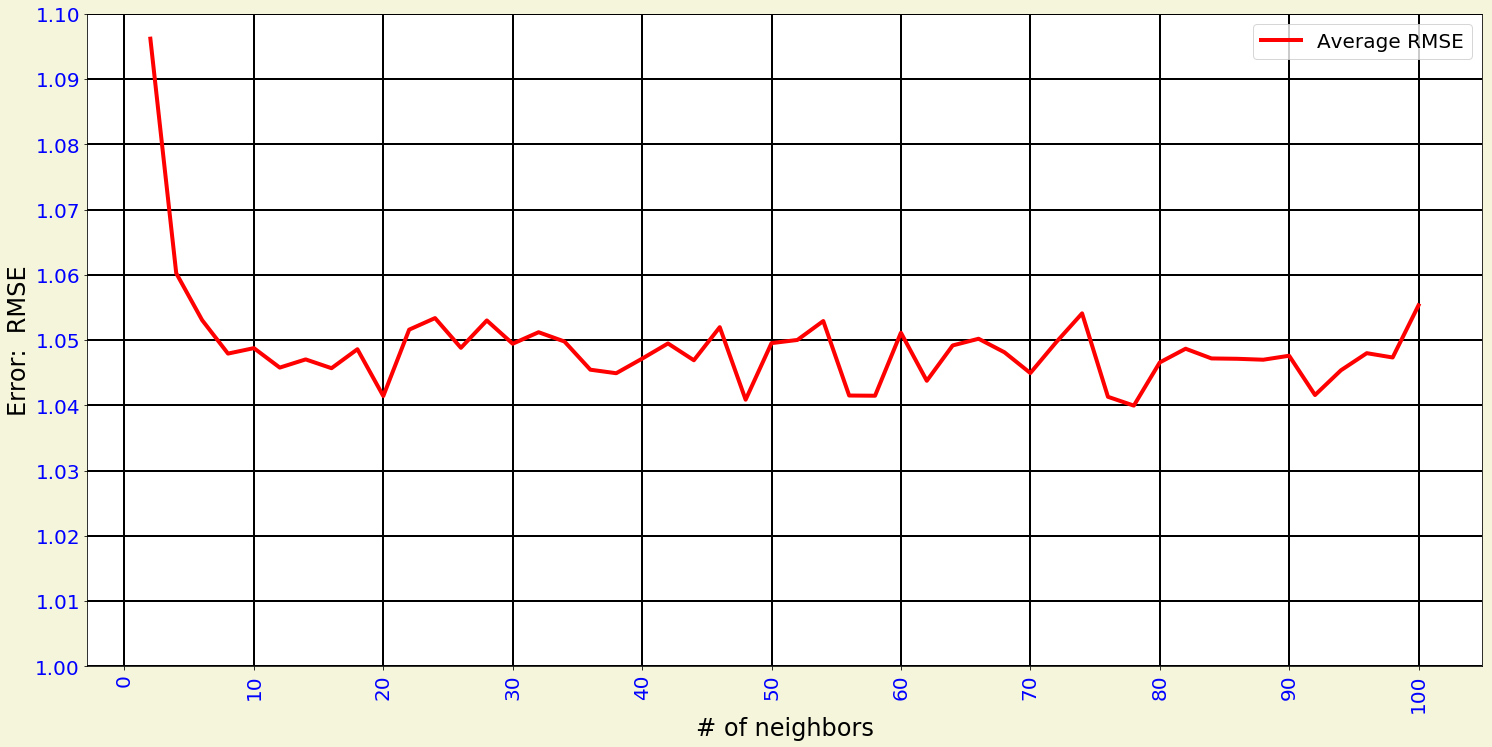

In [11]:
#plot question 13
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(25,12),facecolor = 'beige')
print(' average RMSE is %f for k = %d' %(np.min(err_rmse),np.argmin(err_rmse)))

plt.plot(range, err_rmse, label = "Average RMSE",color = 'red',lw = 4)
plt.xlabel('# of neighbors',fontsize=24)
plt.ylabel('Error:  RMSE',fontsize=24)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.legend(fontsize=20)
plt.xticks(np.arange(0,105,10),fontsize=20,rotation="vertical",color='blue')
plt.yticks(np.arange(1.00,1.10,0.01),fontsize=20,color='blue')
plt.show()

In [12]:
#q14 predict ratings of highvariance movies
from surprise.model_selection import KFold
from surprise import accuracy
from surprise import KNNWithMeans
import pandas as pd
from surprise import Reader
from surprise import Dataset
from collections import Counter
from collections import defaultdict

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def highvar(mydataset):
    movielist = defaultdict(list)
    for count in mydataset:
         movielist[count[1]].append(count[2])
    highvar_movies = [count for count in mydataset if len(movielist[count[1]]) >= 5 and np.var(movielist[count[1]]) >= 2.0]
    return highvar_movies

del range
#sweepking k from 2 to 100 by increments of 2
range = range(2,102,2)
err_rmse = []
crossval = KFold(n_splits=10)
for k in range:
    highvar_pearson = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    act_rmse = []
    for trainset, testset in crossval.split(mydataset):
        highvar_pearson.fit(trainset)
        highvar_movie_predictions = highvar_pearson.test(highvar(testset))
        act_rmse.append(accuracy.rmse(highvar_movie_predictions, verbose=False))
    err_rmse.append(np.mean(act_rmse))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

 average RMSE is 1.383283 for k = 12


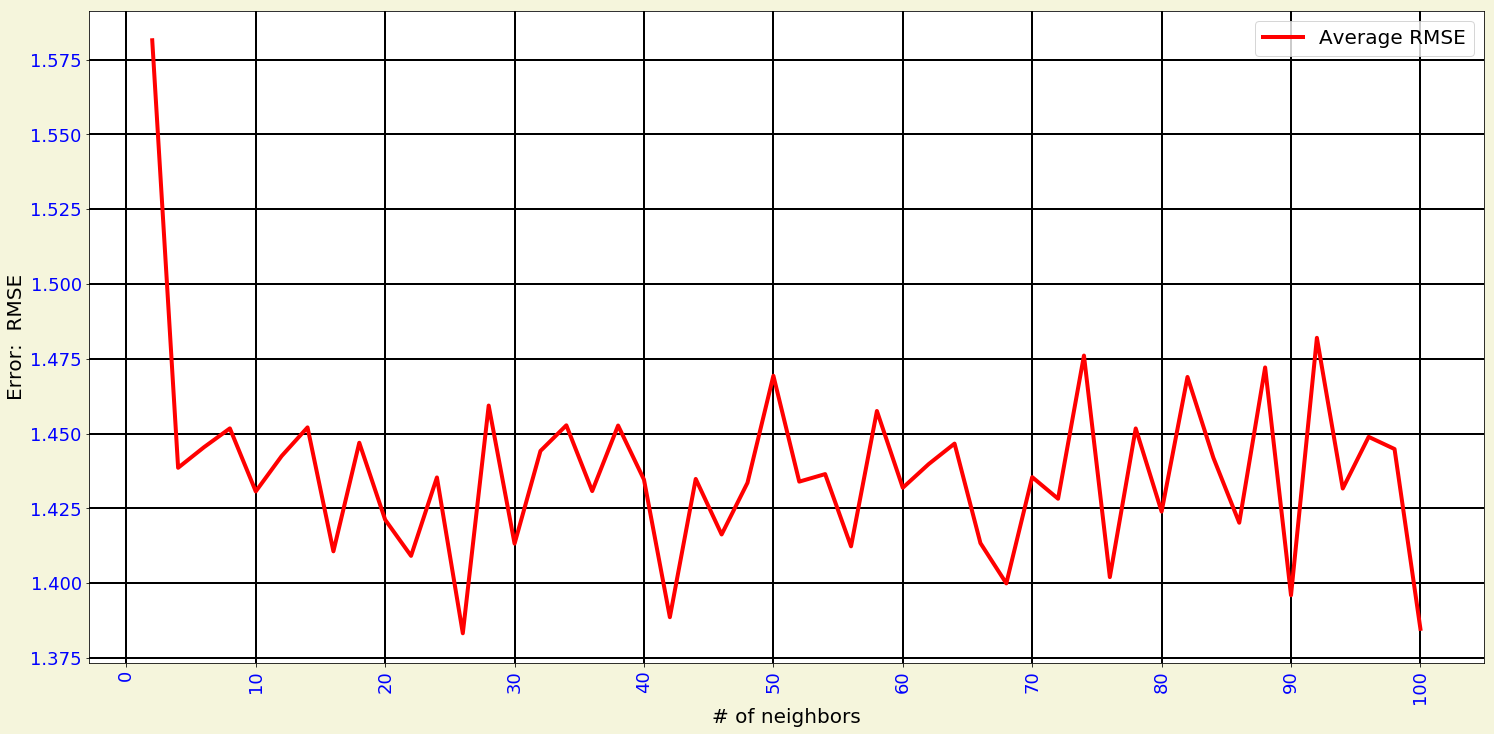

In [13]:
#plot question 14
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(25,12),facecolor = 'beige')
print(' average RMSE is %f for k = %d' %(np.min(err_rmse),np.argmin(err_rmse)))

plt.plot(range, err_rmse, label = "Average RMSE",color = 'red',lw = 4)
plt.xlabel('# of neighbors',fontsize=20)
plt.ylabel('Error:  RMSE',fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.legend(fontsize=20)
plt.xticks(np.arange(0,105,10),fontsize=18,rotation="vertical",color='blue')
plt.yticks(fontsize=18,color='blue')
#np.arange(1.2,1.40,0.4),
plt.show()

Computing the pearson similarity matrix...
Done computing similarity matrix.


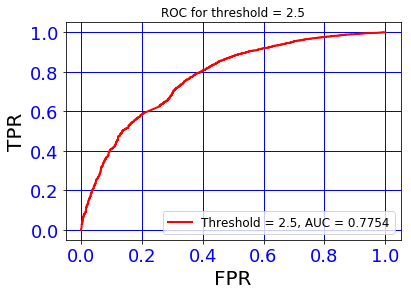

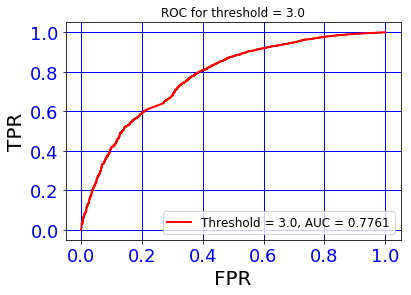

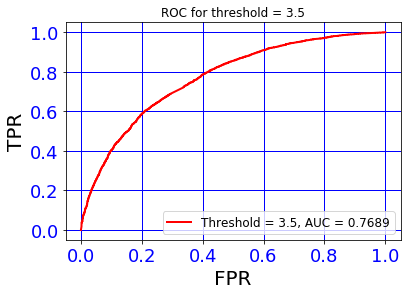

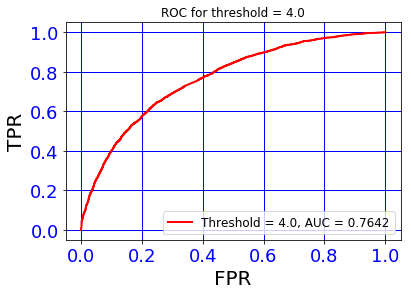

In [14]:
#q15 roc curves
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

t = [2.5,3,3.5,4]
# split data into 90/10
traincorpus, testcorpus = train_test_split(mydataset, test_size=0.1, random_state=0)

pearson_algo = KNNWithMeans(k=20, sim_options = {'name':'pearson'}) 
pearson_algo.fit(traincorpus)

pred_act = pearson_algo.test(testcorpus)
pred_est = np.array([i.est for i in pred_act])
movieratings = np.array([i.r_ui for i in pred_act])

for threshold in t:
    y_score = pred_est
    y_true = movieratings>=threshold
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.grid('true',color='blue', linestyle='-', linewidth=1)
    plt.plot(fpr, tpr, lw=2, label='Threshold = %0.1f, AUC = %0.4f' % (threshold,roc_auc),color='red')
    plt.xlabel('FPR',fontsize=20)
    plt.ylabel('TPR',fontsize=20)
    plt.legend(loc ='best',fontsize=12)
    plt.title('ROC for threshold = %0.1f' %threshold)
    plt.xticks(fontsize=18,color='blue')
    plt.yticks(fontsize=18,color='blue')
    plt.show()
    

In [15]:
#q17
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from sklearn.metrics import roc_curve, auc
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF

del range
range = range(2, 52, 2)
avg_rmse, avg_mae = [], []

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

print("Working on Q17")
for k in range:
    algo = NMF(n_factors=k)
    results = cross_validate(algo, mydataset, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    avg_rmse.append(np.mean(results['test_rmse']))
    avg_mae.append(np.mean(results['test_mae']))

Working on Q17


 average RMSE is 1.383283 for k = 12


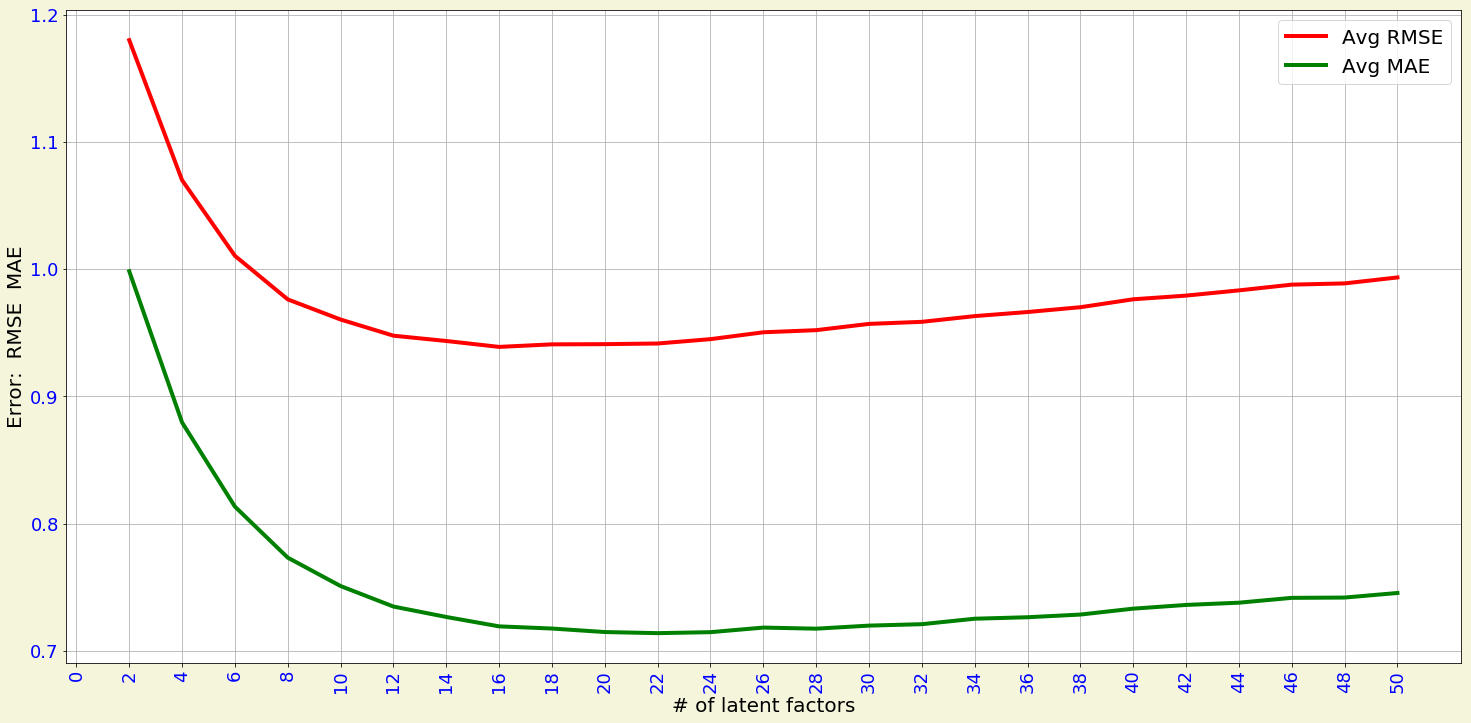

In [16]:
#q17 plot
print(' average RMSE is %f for k = %d' %(np.min(err_rmse),np.argmin(err_rmse)))

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(25,12),facecolor = 'beige')

plt.plot(range, avg_rmse, label = "Avg RMSE",color = 'red',lw = 4)
plt.plot(range, avg_mae, label = "Avg MAE",color = 'green',lw = 4)
plt.xlabel('# of latent factors',fontsize=20)
plt.ylabel('Error:  RMSE  MAE',fontsize=20)
plt.grid('true')
plt.legend(fontsize=20)

plt.xticks(np.arange(0,52,2),fontsize=18,rotation="vertical",color='blue')
plt.yticks(fontsize=18,color='blue')
plt.show()

In [17]:
#q18
movies = pd.read_csv("ml-latest-small/movies.csv")
genres = set('|'.join(movies.genres).split('|'))
print('# Counts - ', len(genres))


# Counts -  20


In [18]:
#q19 NNMF Pop Movies

from surprise.model_selection import KFold
from surprise import accuracy
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
import pandas as pd
from surprise import Reader
from surprise import Dataset
from collections import Counter

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def popmovies(mydataset):
    popmovies_counter = Counter([count[1] for count in mydataset])
    popmovies_dataset = [count for count in mydataset if popmovies_counter[count[1]] > 2]
    return popmovies_dataset

#sweepking k from 2 to 100 by increments of 2
del range
range = range(2,52,2)
err_rmse = []
crossval = KFold(n_splits=10)
for k in range:
    algo = NMF(n_factors=k)
    act_rmse = []
    for trainset, testset in crossval.split(mydataset):
        algo.fit(trainset)
        pop_movie_predictions = algo.test(popmovies(testset))
        act_rmse.append(accuracy.rmse(pop_movie_predictions, verbose=False))
    err_rmse.append(np.mean(act_rmse))

print('Minimum average RMSE is ', min(err_rmse), ' for k = ', range[np.argmin(err_rmse)])

Minimum average RMSE is  0.8919024311857502  for k =  16


 average RMSE is 0.891902 for k = 7


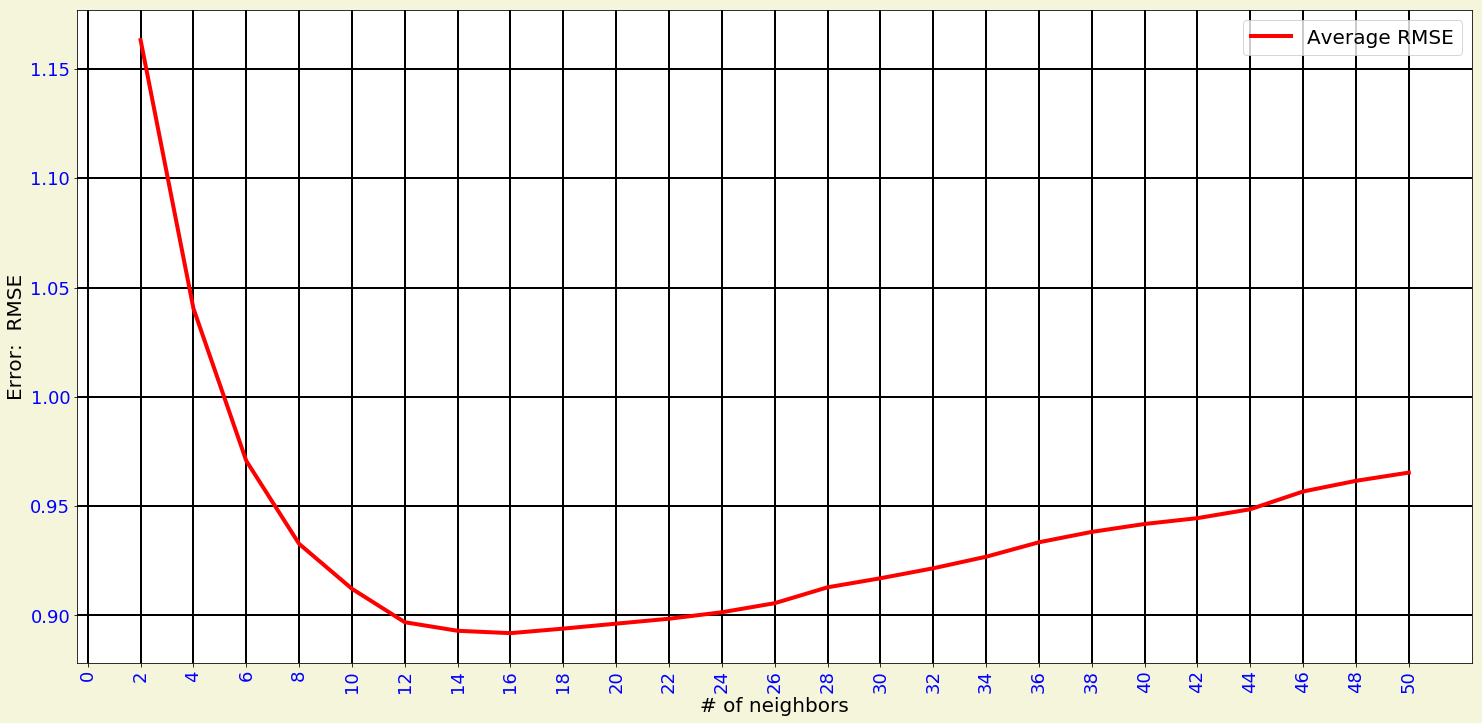

In [19]:
#plot question 19 plot 
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(25,12),facecolor = 'beige')
print(' average RMSE is %f for k = %d' %(np.min(err_rmse),np.argmin(err_rmse)))

plt.plot(range, err_rmse, label = "Average RMSE",color = 'red',lw = 4)
plt.xlabel('# of neighbors',fontsize=20)
plt.ylabel('Error:  RMSE',fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.legend(fontsize=20)
plt.xticks(np.arange(0,52,2),fontsize=18,rotation="vertical",color='blue')
plt.yticks(fontsize=18,color='blue')
plt.show()

In [20]:
#q20 NNMF predict ratings of unpopular movies


dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def unpopmovies(mydataset):
    unpopmovies_counter = Counter([count[1] for count in mydataset])
    unpopmovies_dataset = [count for count in mydataset if unpopmovies_counter[count[1]] < 2]
    return unpopmovies_dataset

#sweepking k from 2 to 100 by increments of 2
del range
range = range(2,52,2)
err_rmse = []
crossval = KFold(n_splits=10)
for k in range:
    algo = NMF(n_factors=k)
    act_rmse = []
    for trainset, testset in crossval.split(mydataset):
        algo.fit(trainset)
        unpop_movie_predictions = algo.test(unpopmovies(testset))
        act_rmse.append(accuracy.rmse(unpop_movie_predictions, verbose=False))
    err_rmse.append(np.mean(act_rmse))

print('Minimum average RMSE is ', min(err_rmse), ' for k = ', range[np.argmin(err_rmse)])

Minimum average RMSE is  1.0688942097537901  for k =  28


 average RMSE is 1.068894 for k = 13


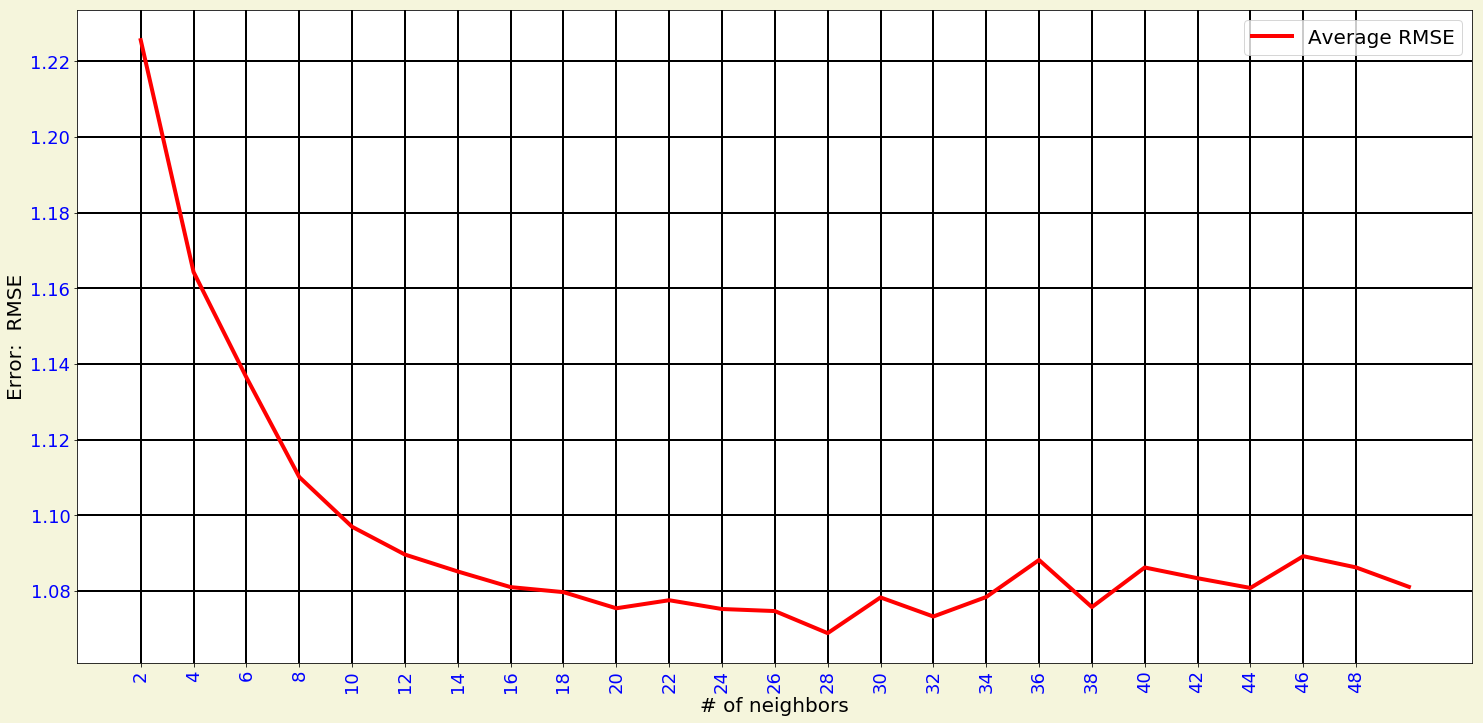

In [21]:
#plot question 20 NNMF
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(25,12),facecolor = 'beige')
print(' average RMSE is %f for k = %d' %(np.min(err_rmse),np.argmin(err_rmse)))

plt.plot(range, err_rmse, label = "Average RMSE",color = 'red',lw = 4)
plt.xlabel('# of neighbors',fontsize=20)
plt.ylabel('Error:  RMSE',fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.legend(fontsize=20)
plt.xticks(np.arange(2,50,2),fontsize=18,rotation="vertical",color='blue')
plt.yticks(fontsize=18,color='blue')
plt.show()

In [22]:
#q21 NNMF High Var movies
from surprise.model_selection import KFold
from surprise import accuracy
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
import pandas as pd
from surprise import Reader
from surprise import Dataset
from collections import Counter
from surprise import Dataset
from collections import Counter
from collections import defaultdict

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def highvar(mydataset):
    movielist = defaultdict(list)
    for count in mydataset:
#        movielist[val[1]].append(val[2])
         movielist[count[1]].append(count[2])
    highvar_movies = [count for count in mydataset if len(movielist[count[1]]) >= 5 and np.var(movielist[count[1]]) >= 2.0]
    return highvar_movies

del range
#sweepking k from 2 to 100 by increments of 2
range = range(2,52,2)
err_rmse = []
crossval = KFold(n_splits=10)
for k in range:
    algo = NMF(n_factors=k)
    act_rmse = []
    for trainset, testset in crossval.split(mydataset):
        algo.fit(trainset)
        highvar_movie_predictions = algo.test(highvar(testset))
        act_rmse.append(accuracy.rmse(highvar_movie_predictions, verbose=False))
    err_rmse.append(np.mean(act_rmse))
print('Minimum average RMSE is ', min(err_rmse), ' for k = ', range[np.argmin(err_rmse)])

Minimum average RMSE is  1.4012155472098118  for k =  6


 average RMSE is 1.401216 for k = 2


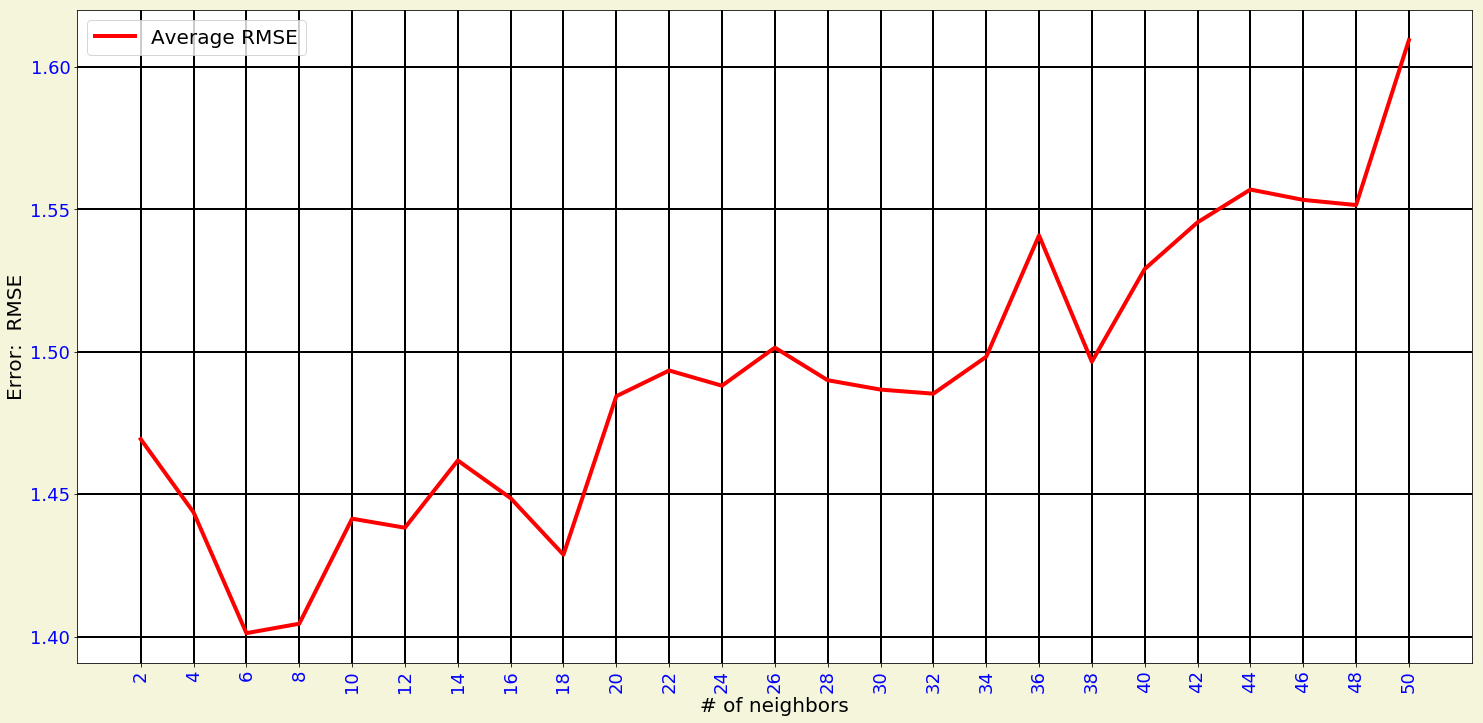

In [23]:
#q21 NNMF Plot
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(25,12),facecolor = 'beige')
print(' average RMSE is %f for k = %d' %(np.min(err_rmse),np.argmin(err_rmse)))

plt.plot(range, err_rmse, label = "Average RMSE",color = 'red',lw = 4)
plt.xlabel('# of neighbors',fontsize=20)
plt.ylabel('Error:  RMSE',fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.legend(fontsize=20)
plt.xticks(np.arange(2,52,2),fontsize=18,rotation="vertical",color='blue')
plt.yticks(fontsize=18,color='blue')
plt.show()

ROC Curve with threshold =  2.5


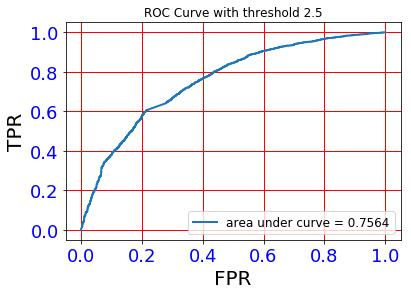

ROC Curve with threshold =  3


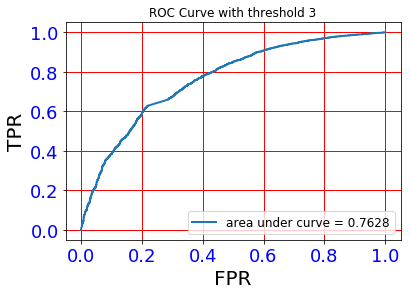

ROC Curve with threshold =  3.5


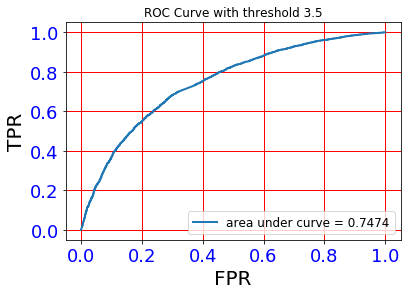

ROC Curve with threshold =  4


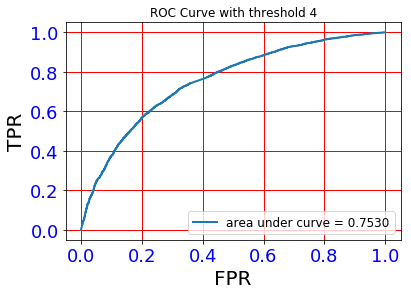

In [24]:
#q22 NNMF ROC curves
from surprise.model_selection import cross_validate, train_test_split, KFold
import pandas as pd
from surprise import accuracy, Reader, Dataset
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
from sklearn.metrics import roc_curve, auc

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

opt_lf = 20 #optimum latent factors
trainset, testset = train_test_split(mydataset, test_size=.10)

algo = NMF(n_factors=opt_lf)
algo.fit(trainset)
predictions = algo.test(testset)

actual = [i.r_ui for i in predictions]
predicted = [i.est for i in predictions]

thresholds = [2.5, 3, 3.5, 4]

for val in thresholds:
    print("ROC Curve with threshold = ", val)
    y_test = np.array(actual) >= val
    y_score = predicted
    fpr, tpr, _ = roc_curve(y_test, y_score)

    plt.figure()
    plt.plot(fpr, tpr, lw=2, label='area under curve = %0.4f' % auc(fpr,tpr))
    plt.grid('true',color='red', linestyle='-', linewidth=1)
    plt.xlabel('FPR',fontsize=20)
    plt.ylabel('TPR',fontsize=20)
    plt.legend(loc ='best',fontsize=12)
    plt.title('ROC Curve with threshold ' + str(val))
    plt.xticks(fontsize=18,color='blue')
    plt.yticks(fontsize=18,color='blue')
    plt.show()




Top Movie -  0
['Thriller', 'Drama|Thriller', 'Drama|Horror|Thriller', 'Drama', 'Adventure|Children|Fantasy', 'Action|Crime|Thriller', 'Crime|Thriller', 'Horror|Sci-Fi', 'Action|Drama|Sci-Fi', 'Comedy|Romance']


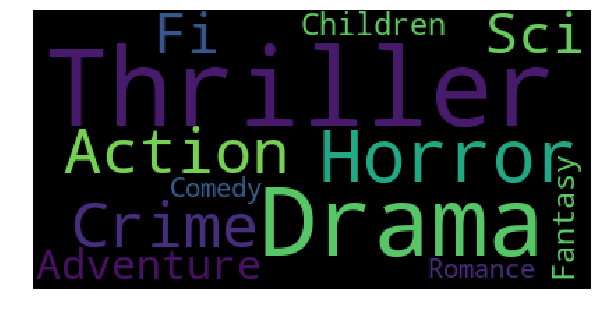


Top Movie -  1
['Thriller', 'Action|Drama', 'Action|Sci-Fi|Thriller|IMAX', 'Comedy|Horror', 'Drama', 'Comedy', 'Drama|Thriller', 'Comedy|Crime|Drama|Thriller', 'Crime|Drama|Film-Noir', 'Documentary']


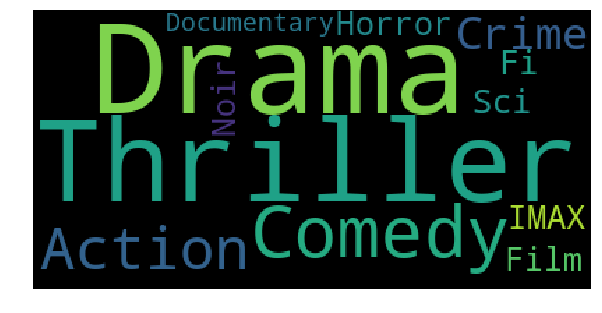


Top Movie -  2
['Comedy', 'Comedy|Fantasy', 'Adventure|Animation|Drama', 'Action|Comedy|Crime|Thriller', 'Drama|Romance', 'Drama|Thriller', 'Comedy', 'Comedy', 'Drama|Romance', 'Crime|Drama|Film-Noir']


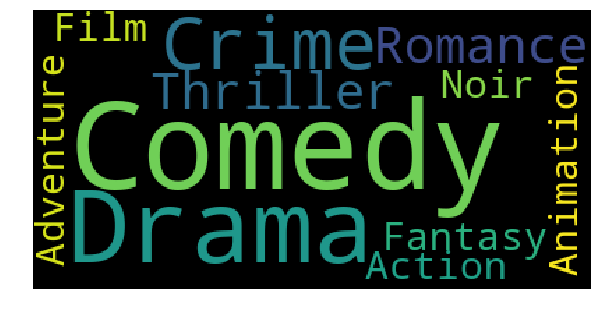


Top Movie -  3
['Drama|Romance', 'Adventure|Children|Sci-Fi', 'Comedy', 'Comedy|Romance', 'Comedy', 'Drama|Romance', 'Action|Sci-Fi|Thriller|IMAX', 'Comedy|Romance', 'Action|Comedy|Romance', 'Drama|Mystery|Romance|Thriller']


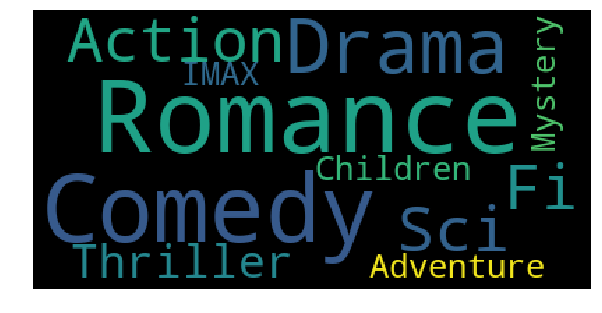


Top Movie -  4
['Drama', 'Crime|Drama', 'Comedy', 'Comedy|Drama', 'Action|Adventure|Thriller', 'Horror|Thriller', 'Comedy|Romance', 'Comedy|Drama|Romance', 'Comedy|Documentary|Drama', 'Western']


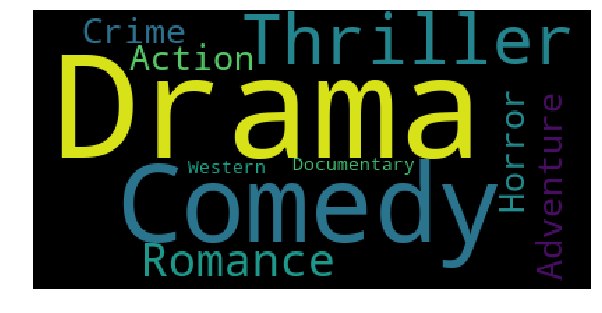


Top Movie -  5
['Action|Drama|Fantasy|Horror|Mystery|Sci-Fi|Thriller', 'Mystery|Sci-Fi|Thriller|IMAX', 'Comedy', 'Action|Adventure|Sci-Fi', 'Action|Adventure|Sci-Fi', 'Drama', 'Drama|Romance', 'Comedy', 'Comedy|Drama', 'Action|Adventure|Western']


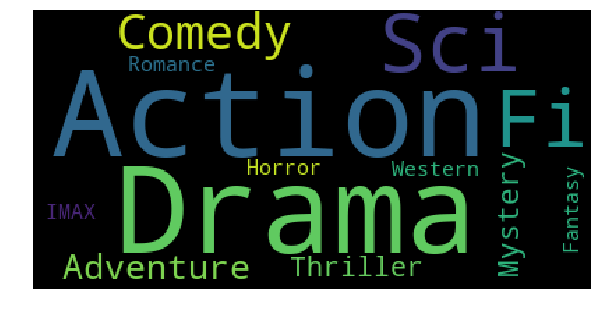


Top Movie -  6
['Crime|Drama|Film-Noir', 'Action|Adventure|Drama|War', 'Drama|Thriller', 'Action|Drama', 'Adventure|Animation|Drama', 'Comedy', 'Horror|Thriller', 'Fantasy|Horror|Thriller', 'Romance', 'Comedy|Crime']


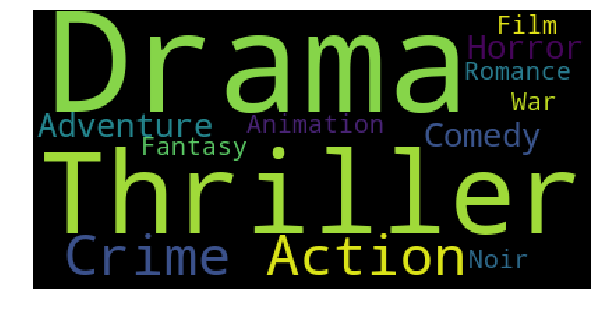


Top Movie -  7
['Horror', 'Crime|Horror|Thriller', 'Action|Adventure|Comedy|Crime', 'Adventure|Comedy|Western', 'Comedy', 'Action|Adventure', 'Comedy|Musical|Romance', 'Action|Drama', 'Drama', 'Action|Thriller']


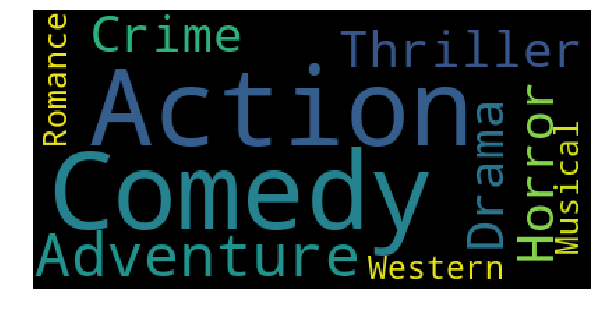


Top Movie -  8
['Drama', 'Comedy', 'Drama|Romance', 'Drama', 'Comedy|Romance', 'Action|Drama', 'Comedy|Drama|Romance', 'Action|Adventure|Fantasy', 'Crime|Drama|Thriller', 'Comedy']


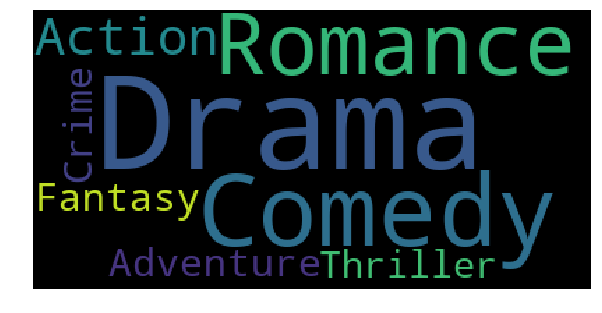


Top Movie -  9
['Action|Animation|Comedy|Crime|Drama|Romance|Thriller', 'Drama', 'Action|Adventure|Sci-Fi|Thriller', 'Comedy', 'Documentary', 'Comedy|Horror', 'Drama', 'Documentary', 'Action|Adventure|Thriller', 'Comedy']


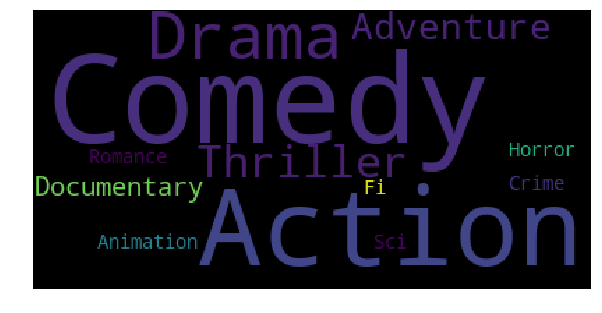


Top Movie -  10
['Action|Horror|Thriller', 'Drama|Horror', 'Comedy|Romance', 'Crime|Drama|Film-Noir|Thriller', 'Action|Comedy|Crime|Thriller', 'Animation|Children|Comedy', 'Musical', 'Drama|Romance', 'Comedy|Drama|Romance', 'Adventure']


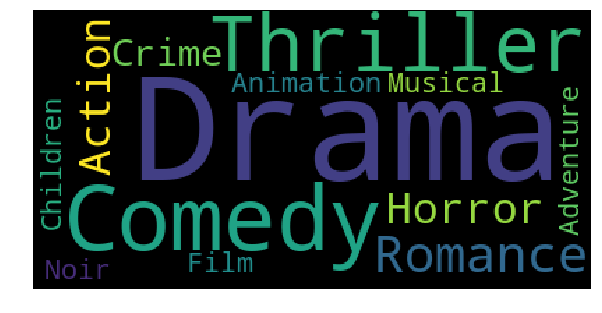


Top Movie -  11
['Children|Comedy|Drama|Musical|Romance', 'Comedy', 'Comedy|Romance', 'Action|Adventure|Thriller', 'Drama|Mystery|Thriller', 'Drama', 'Sci-Fi', 'Comedy|Romance', 'Comedy', 'Action|Fantasy|Sci-Fi']


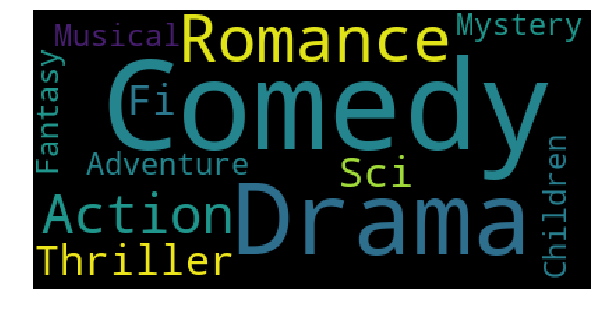


Top Movie -  12
['Action|Drama|Thriller', 'Comedy|Drama|Romance', 'Comedy|Drama', 'Drama|Romance', 'Action|Adventure|Drama|Romance|Thriller', 'Action|Drama', 'Drama', 'Horror|Thriller', 'Crime|Film-Noir|Thriller', 'Crime|Drama|Film-Noir']


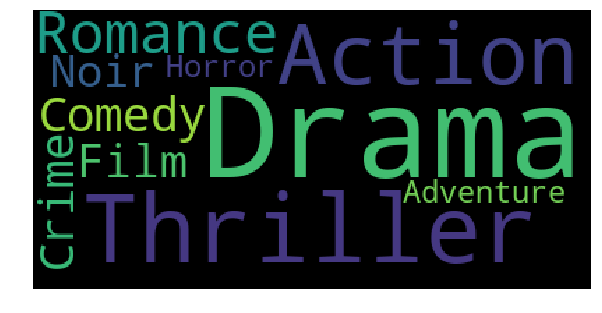


Top Movie -  13
['Drama|Romance', 'Romance', 'Horror|Thriller', 'Drama', 'Action|Adventure|Drama|War', 'Action|Comedy|Crime|Drama|Horror|Thriller', 'Comedy|Horror', 'Action|Crime|Thriller', 'Drama|Romance', 'Mystery|Thriller']


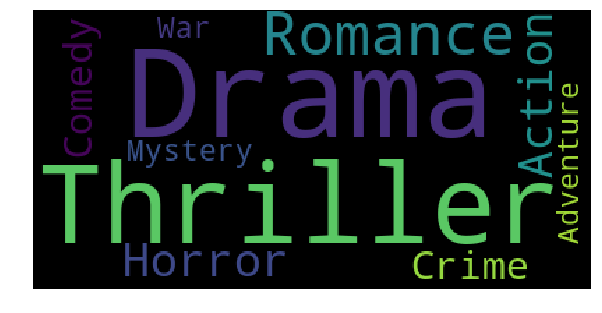


Top Movie -  14
['Crime|Drama|Mystery|Thriller', 'Drama|Musical|Romance', 'Comedy|Romance', 'Mystery|Sci-Fi|Thriller|IMAX', 'Comedy|Musical', 'Drama|Horror', 'Crime|Drama', 'Romance|Western', 'Comedy', 'Comedy']


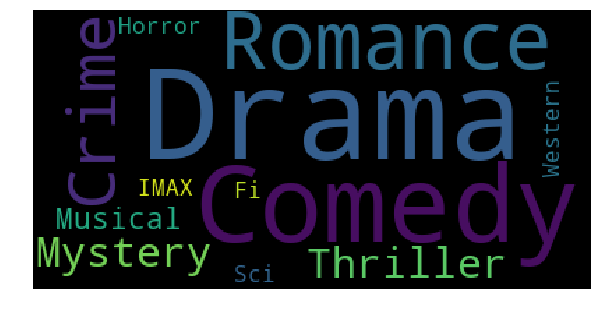


Top Movie -  15
['Comedy|Romance', 'Comedy|Drama', 'Documentary', 'Drama|Thriller', 'Western', 'Adventure|Drama', 'Comedy|Drama|Romance', 'Children|Comedy', 'Adventure', 'Horror|Sci-Fi']


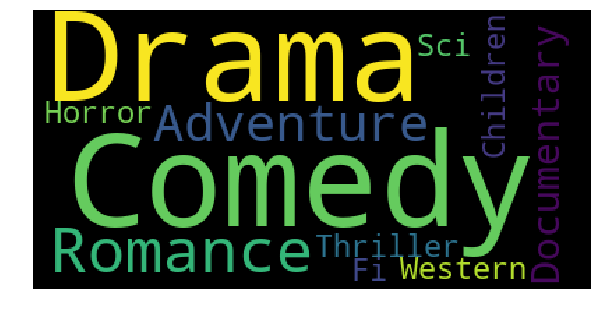


Top Movie -  16
['Crime|Drama|Thriller', 'Comedy|Horror|Sci-Fi', 'Action|Adventure|Drama|Mystery|Thriller', 'Drama|Romance', 'Action|Adventure|Horror|Sci-Fi', 'Comedy|Drama', 'Drama', 'Drama|Fantasy|Mystery|Thriller', 'Adventure|Animation|Children|Sci-Fi|IMAX', 'Drama']


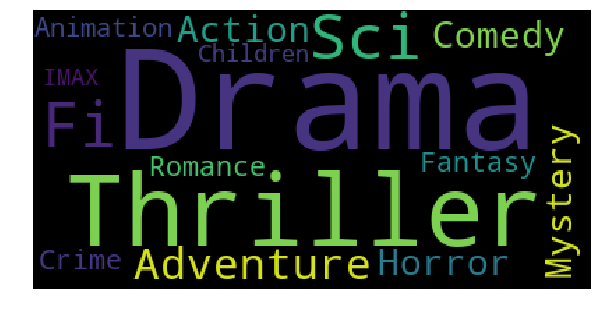


Top Movie -  17
['Action|Comedy|Fantasy|IMAX', 'Comedy|Horror', 'Drama', 'Action|Adventure', 'Documentary', 'Comedy|Romance', 'Horror', 'Adventure|Comedy|Romance', 'Horror', 'Thriller']


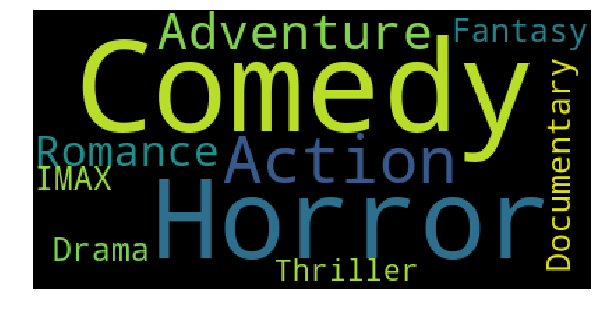


Top Movie -  18
['Action|Adventure', 'Comedy|Romance', 'Drama', 'Drama|Romance', 'Comedy|Drama', 'Action|Crime|Thriller', 'Drama', 'Action|Drama|War', 'Comedy|Drama|Romance', 'Action|Drama|Thriller']


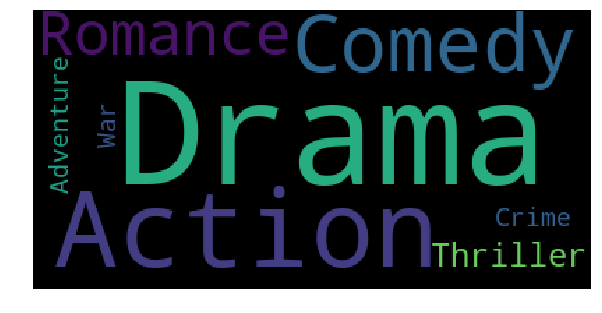


Top Movie -  19
['Comedy|Drama', 'Drama', 'Horror|Sci-Fi', 'Comedy|Drama|Romance', 'Crime|Drama', 'Comedy', 'Drama|Western', 'Drama', 'Drama', 'Action|Crime|Thriller|Western']


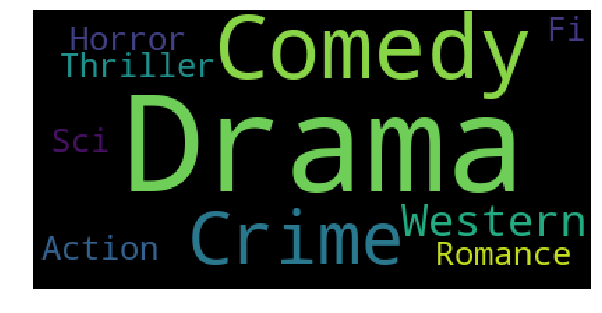

In [25]:
#q23
from wordcloud import WordCloud
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, KFold
import pandas as pd
import re
from surprise import accuracy, Reader, Dataset
from matplotlib import pyplot as plt

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

movies = pd.read_csv("movies.csv")
opt_lf = 20 #optimum latent factors
algo = NMF(n_factors = opt_lf)
trainset, _ = train_test_split(mydataset, test_size=0.01)
algo.fit(trainset)

u = algo.pu
v = algo.qi

del range # Just comment this line if you get the error range is not callable
for mov in range(v.shape[1]):
    print('\nTop Movie - ', mov)
    mov_name = v[: ,mov]
    top10_movies = mov_name.argsort()[-10:][::-1]
    top10_movies_genres = [(movies.genres[i]) for i in top10_movies]
  #  print (top10_movies)
    print(top10_movies_genres)
    
    
    letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(top10_movies_genres))

   
    cloud = WordCloud(background_color='black').generate(letters_only)
    #change the color setting
    plt.figure( figsize=(10,10))
    plt.tight_layout(pad=0)
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()
    

0
Minimum average RMSE is  0.8869056558164793  for k =  12
Minimum average MAE is  0.6822389071793671  for k =  32


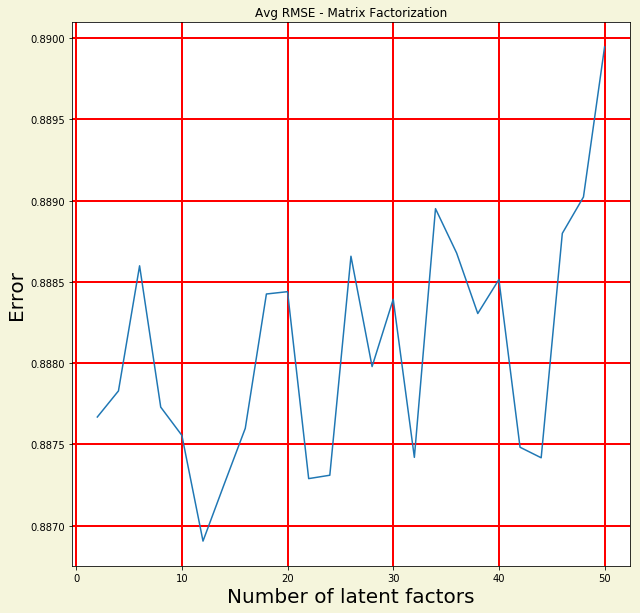

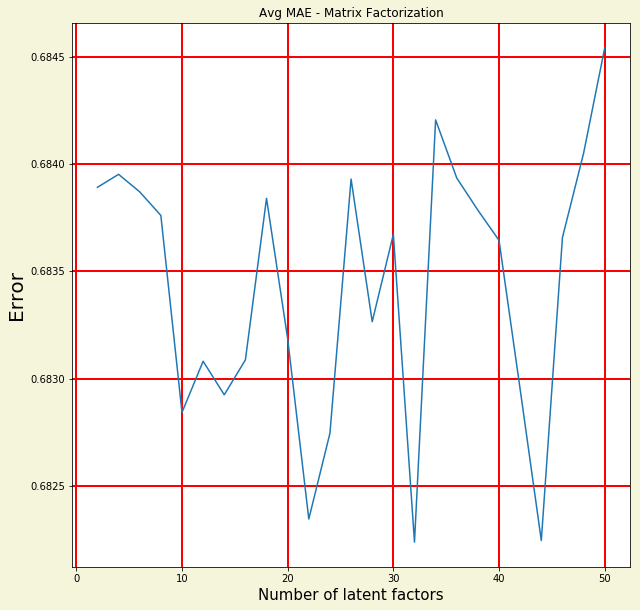

0.5
Minimum average RMSE is  0.8889531610839441  for k =  2
Minimum average MAE is  0.683715995060877  for k =  2


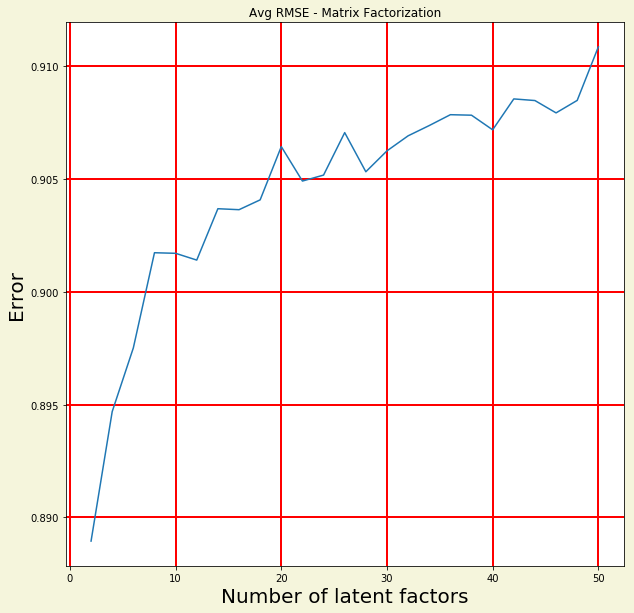

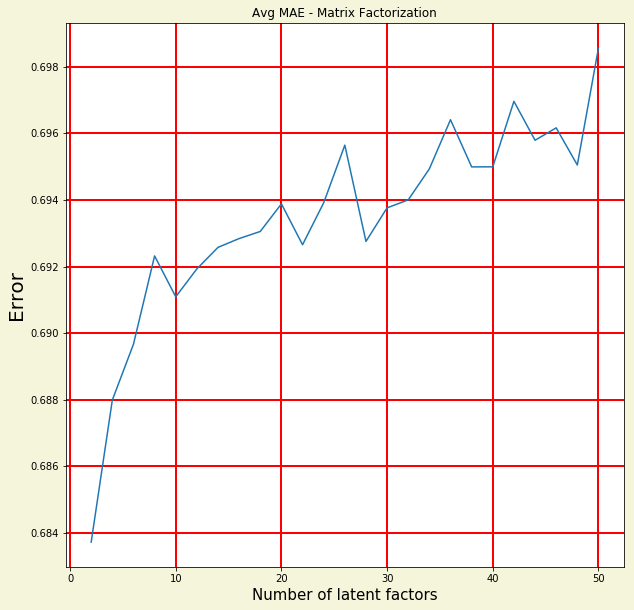

1
Minimum average RMSE is  0.9004269683330121  for k =  2
Minimum average MAE is  0.6918053262175249  for k =  2


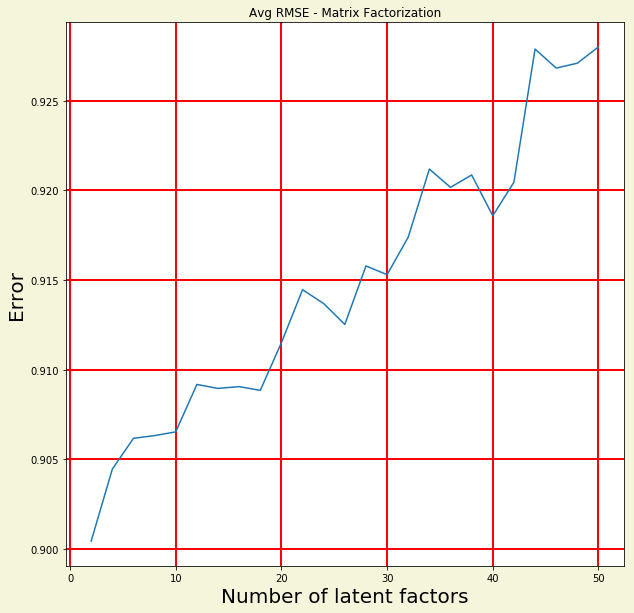

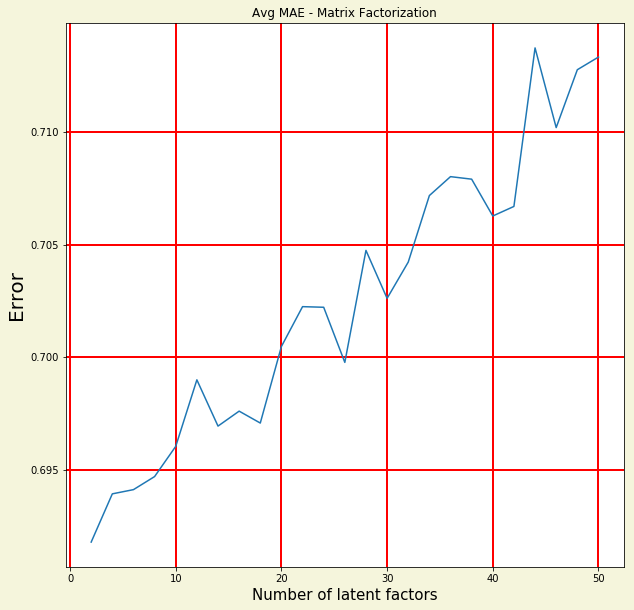

1.5
Minimum average RMSE is  0.9054299778334858  for k =  2
Minimum average MAE is  0.6947333688502965  for k =  2


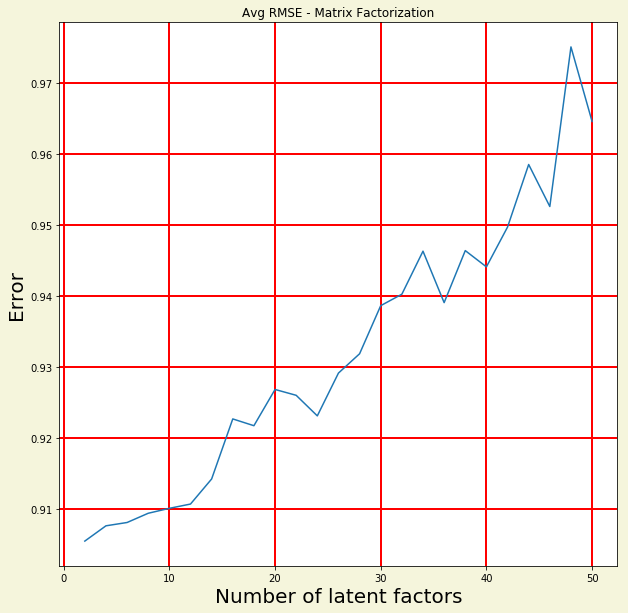

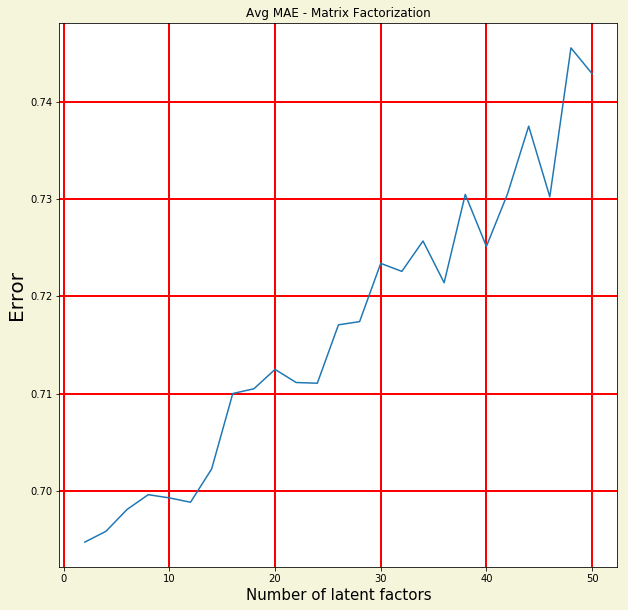

2
Minimum average RMSE is  0.9055290328603673  for k =  2
Minimum average MAE is  0.6952005128933874  for k =  2


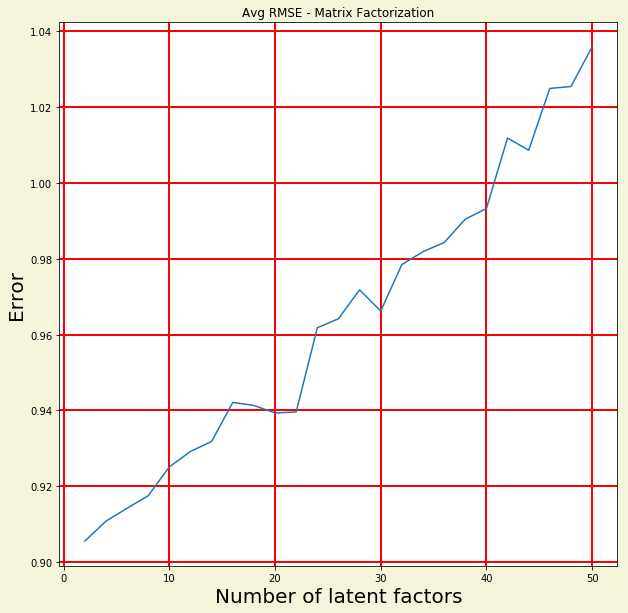

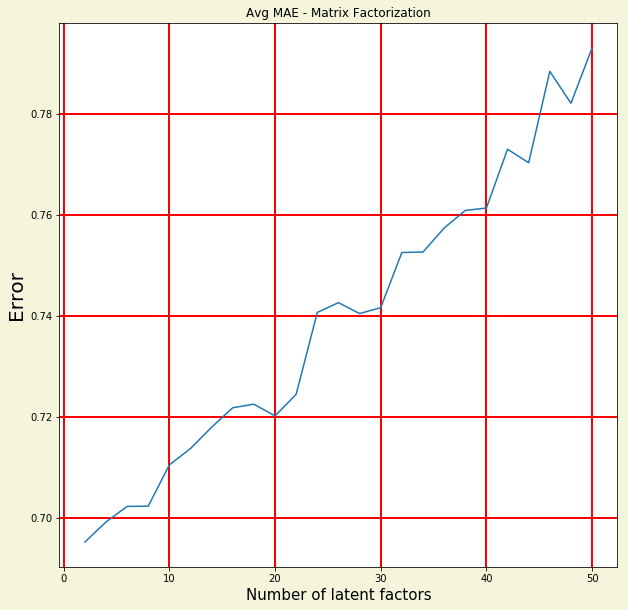

2.5
Minimum average RMSE is  0.906861865773482  for k =  2
Minimum average MAE is  0.6933574957521622  for k =  2


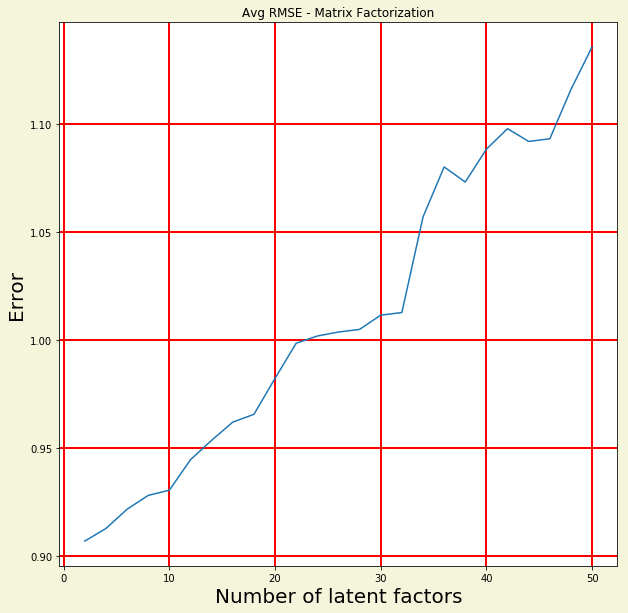

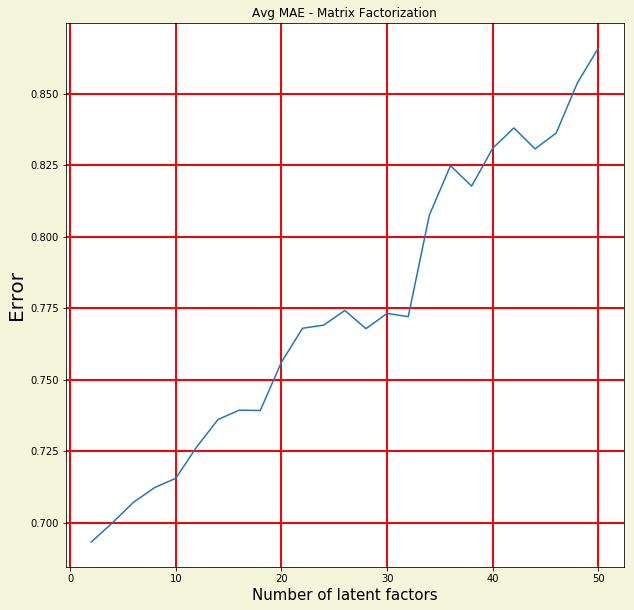

3
Minimum average RMSE is  0.9080620060787015  for k =  2
Minimum average MAE is  0.6972420789860092  for k =  2


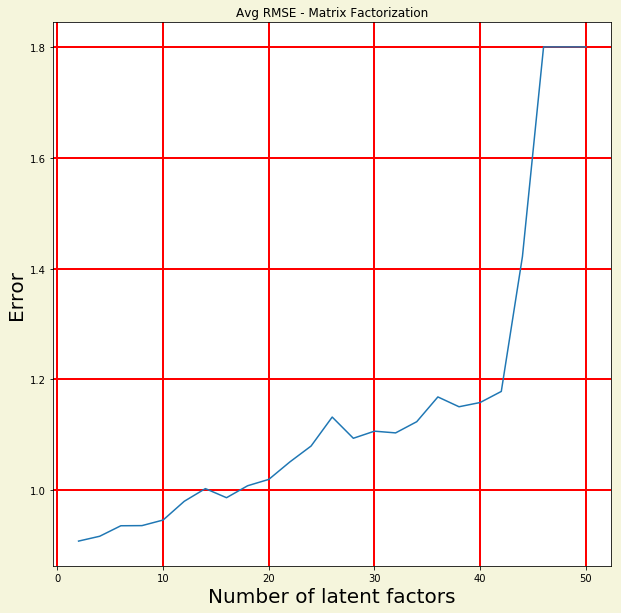

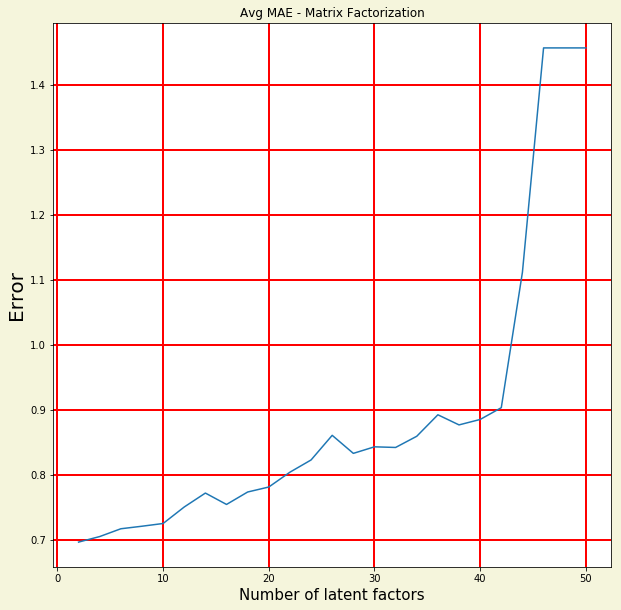

3.5
Minimum average RMSE is  0.9141572720817235  for k =  2
Minimum average MAE is  0.7029867068912264  for k =  2


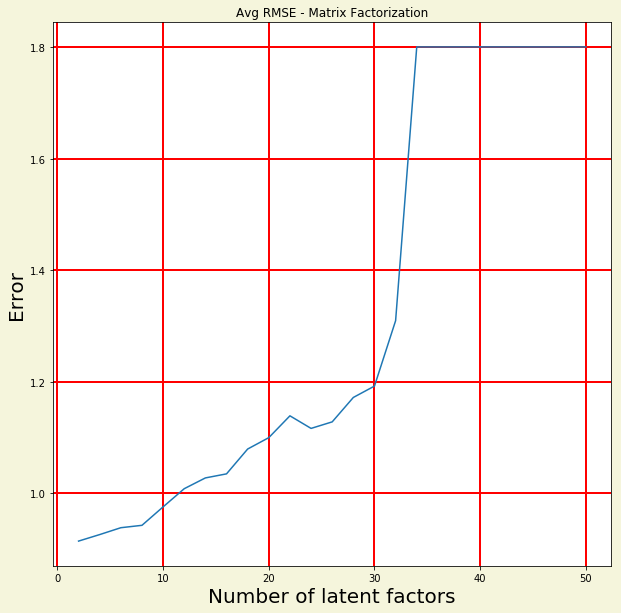

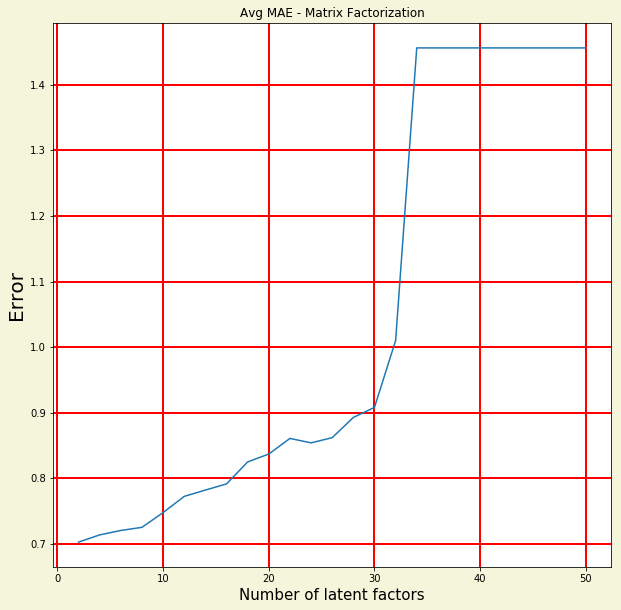

4
Minimum average RMSE is  0.9126279749607477  for k =  2
Minimum average MAE is  0.699938548653637  for k =  2


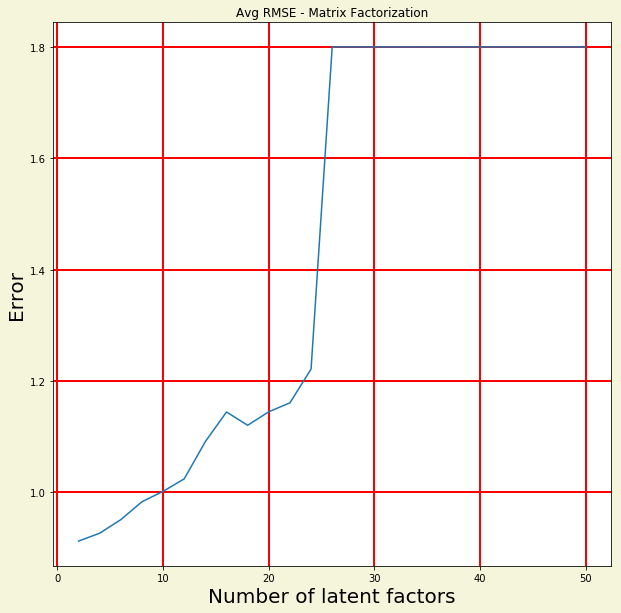

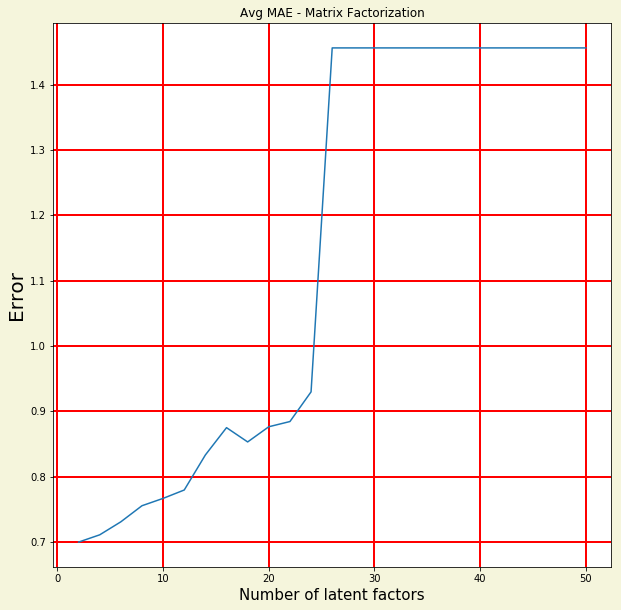

4.5
Minimum average RMSE is  0.9193935827614037  for k =  2
Minimum average MAE is  0.7077252792309763  for k =  2


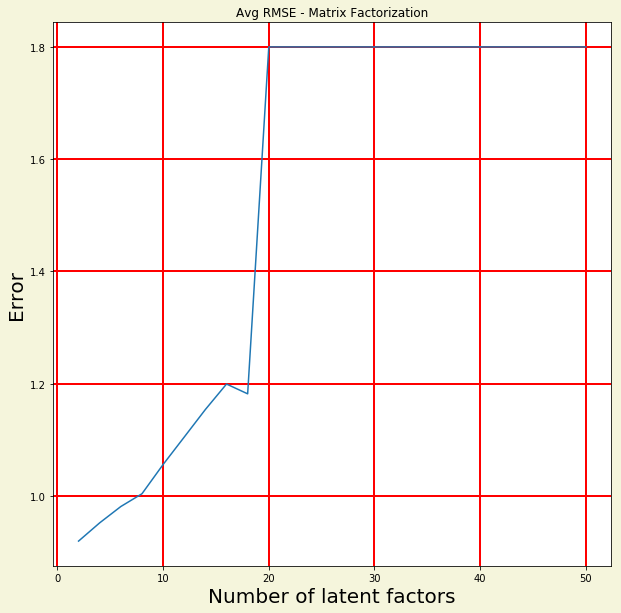

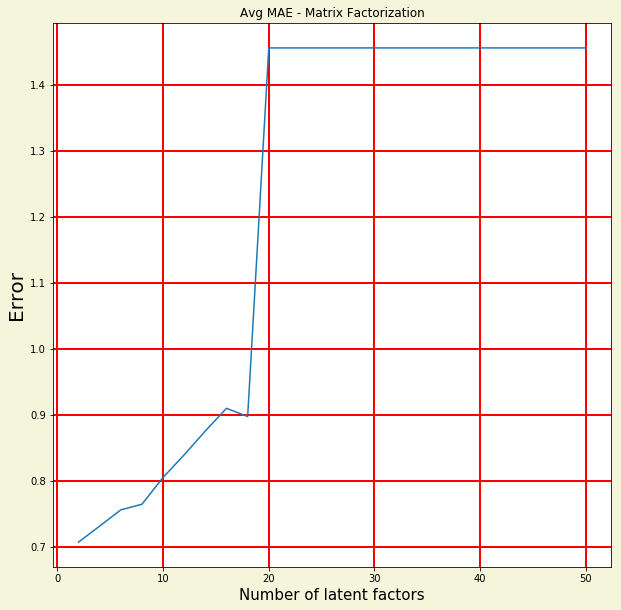

5
Minimum average RMSE is  0.9285315783447136  for k =  2
Minimum average MAE is  0.7118399608312904  for k =  2


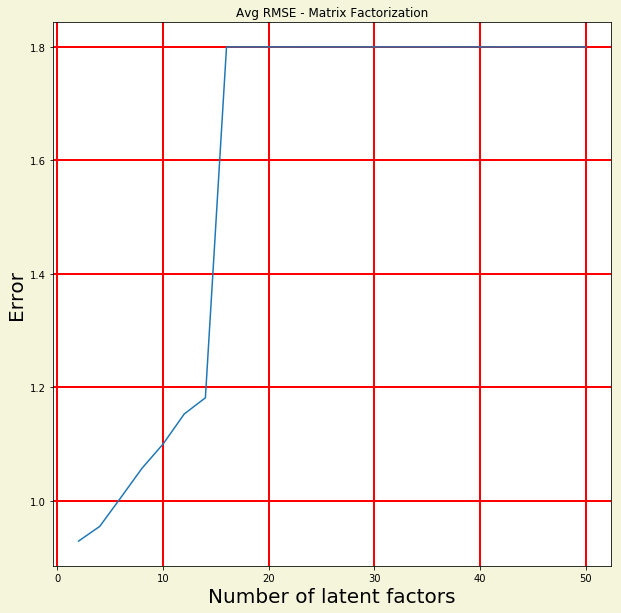

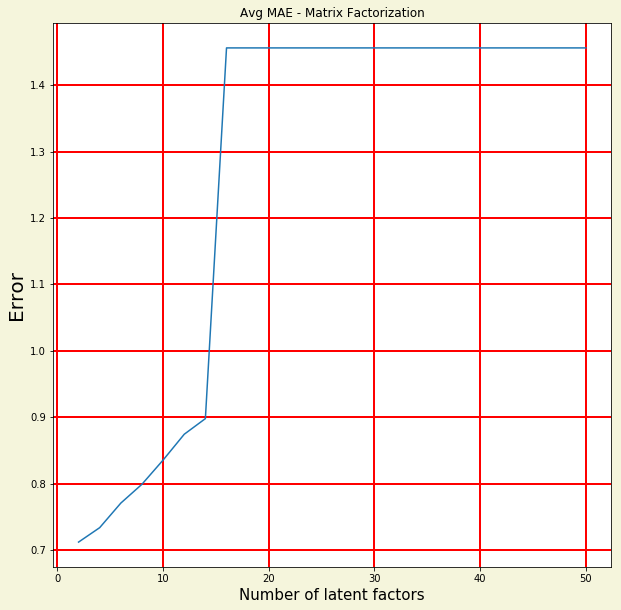

5.5
Minimum average RMSE is  0.9292885061394515  for k =  2
Minimum average MAE is  0.7140397061039755  for k =  2


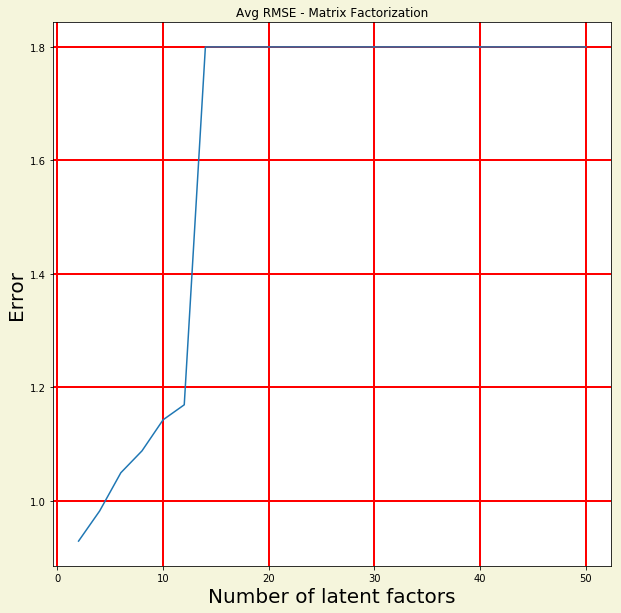

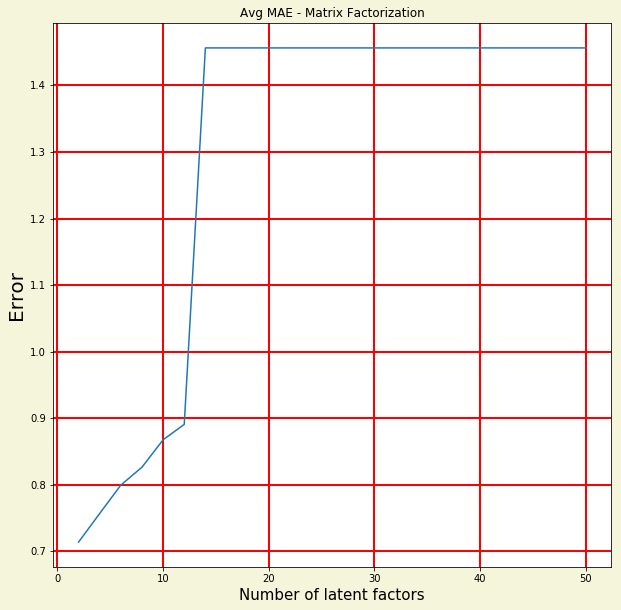

6.0
Minimum average RMSE is  0.9359472284843402  for k =  2
Minimum average MAE is  0.7198747034887647  for k =  2


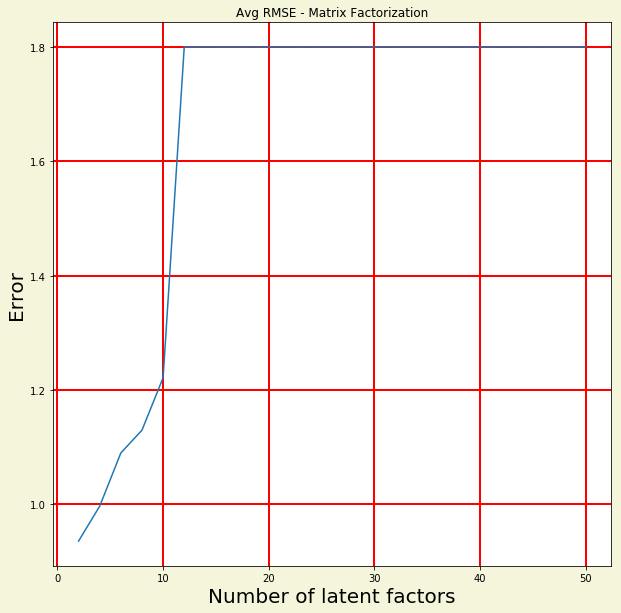

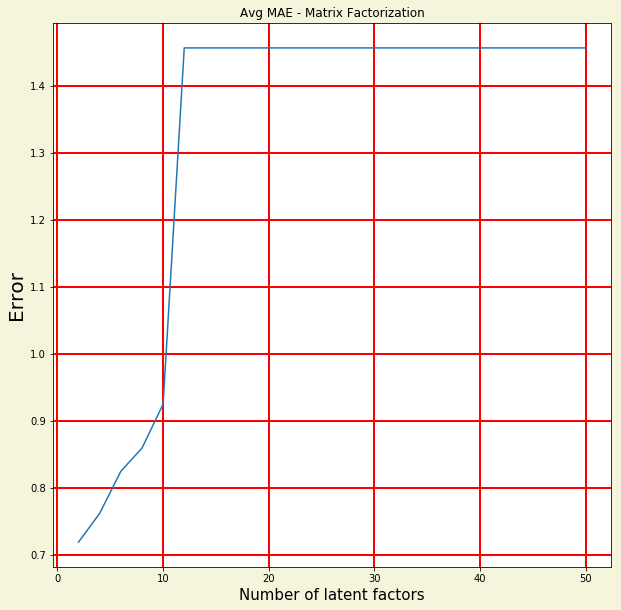

6.5
Minimum average RMSE is  0.954319301007018  for k =  2
Minimum average MAE is  0.7372575231995807  for k =  2


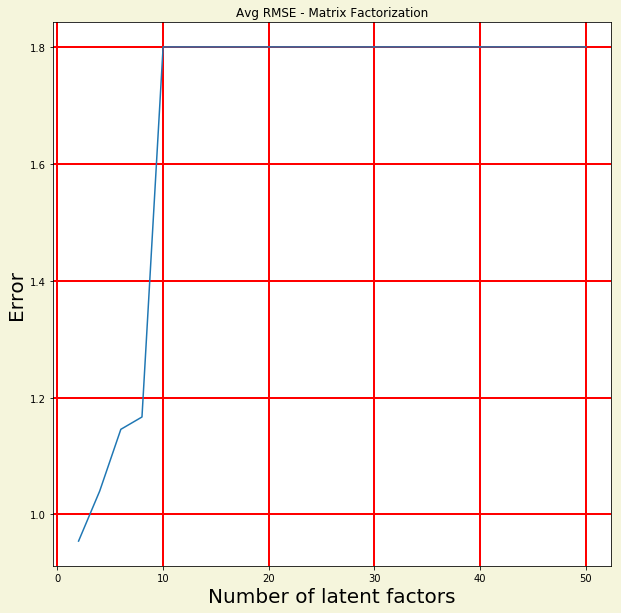

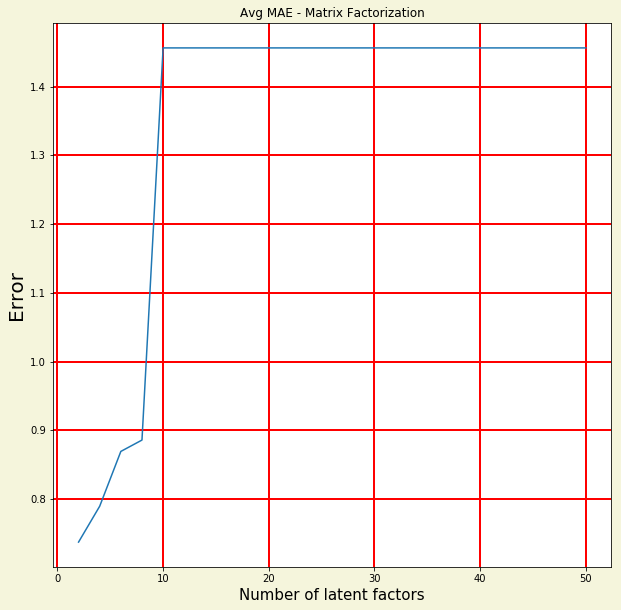

7.0
Minimum average RMSE is  0.9521480407294218  for k =  2
Minimum average MAE is  0.7319275610765941  for k =  2


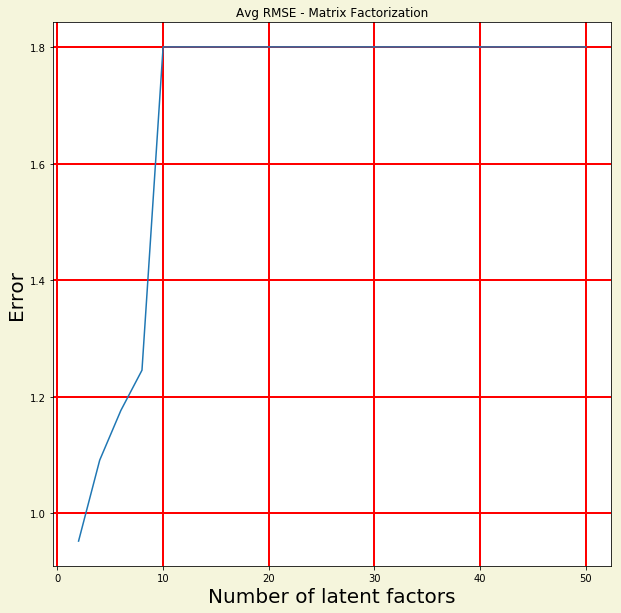

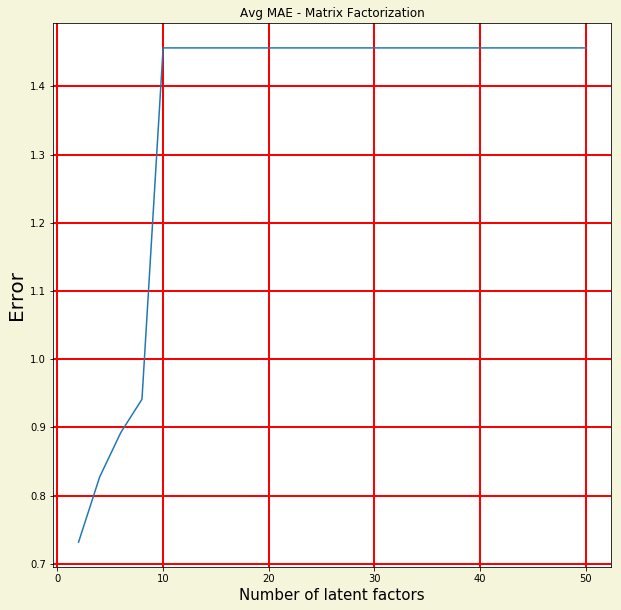

7.5
Minimum average RMSE is  0.9631472168982981  for k =  2
Minimum average MAE is  0.7399256604608937  for k =  2


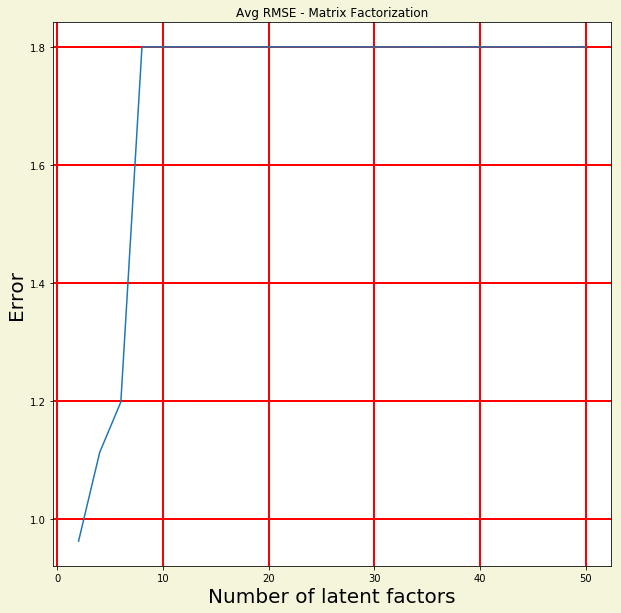

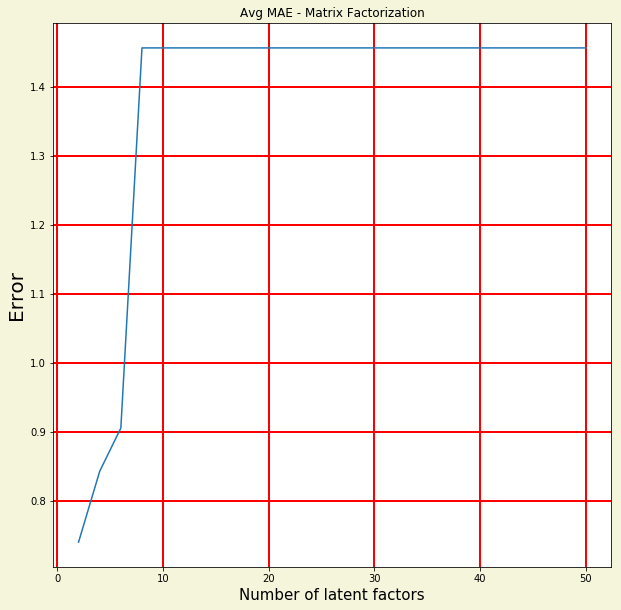

8.0
Minimum average RMSE is  0.9880989688413667  for k =  2
Minimum average MAE is  0.7628137340703162  for k =  2


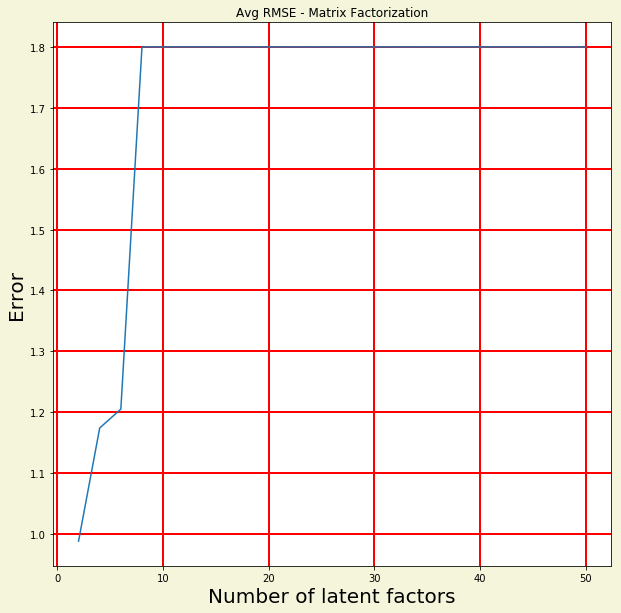

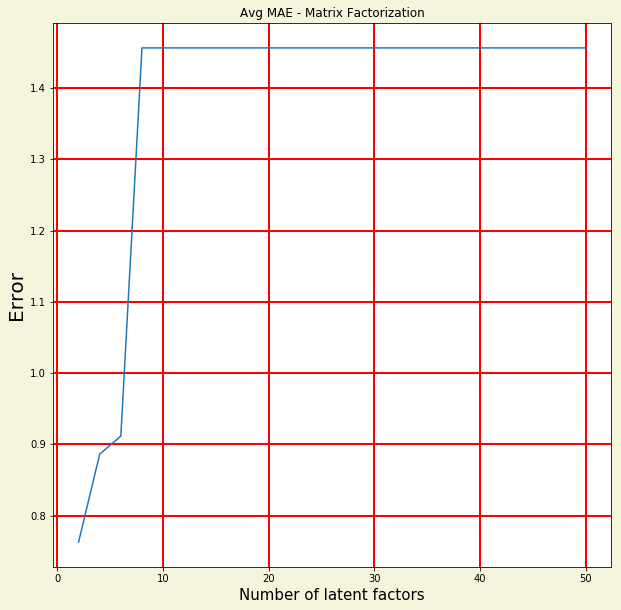

8.5
Minimum average RMSE is  0.9966847711294611  for k =  2
Minimum average MAE is  0.7615899746432909  for k =  2


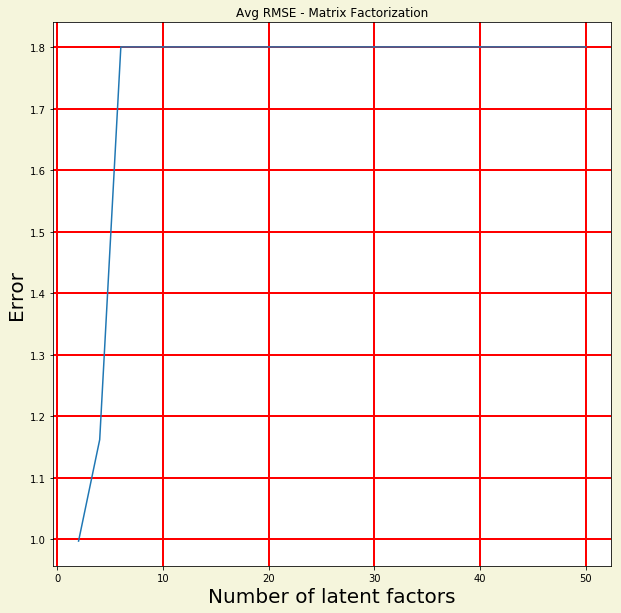

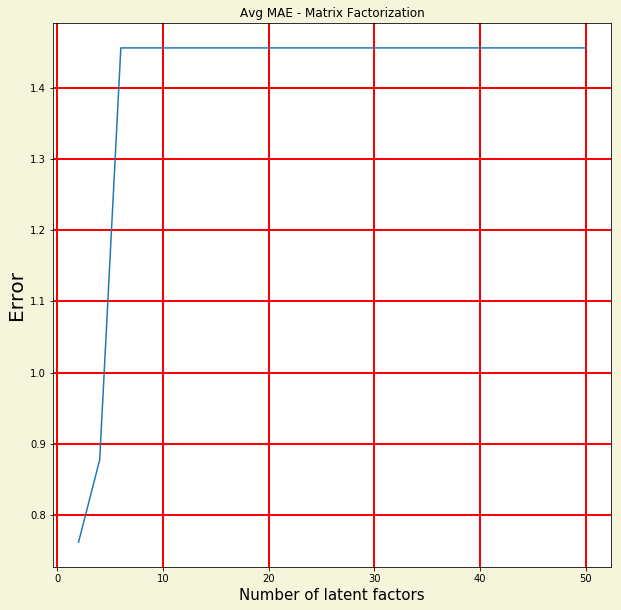

9.0
Minimum average RMSE is  1.0091875756090531  for k =  2
Minimum average MAE is  0.7677306516577797  for k =  2


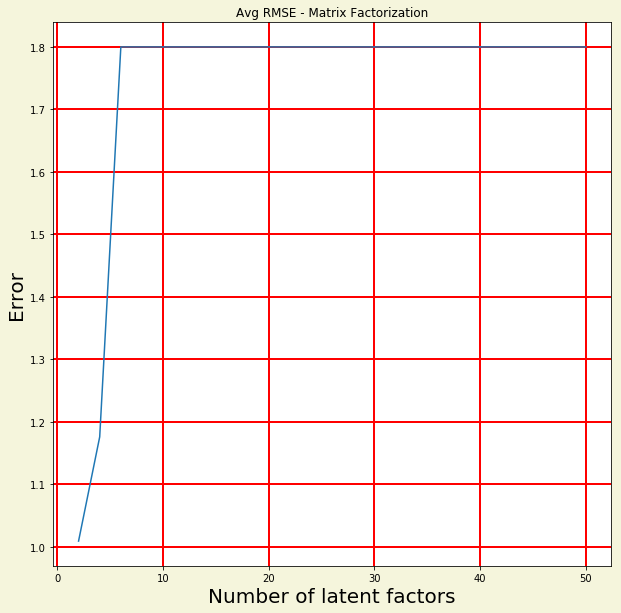

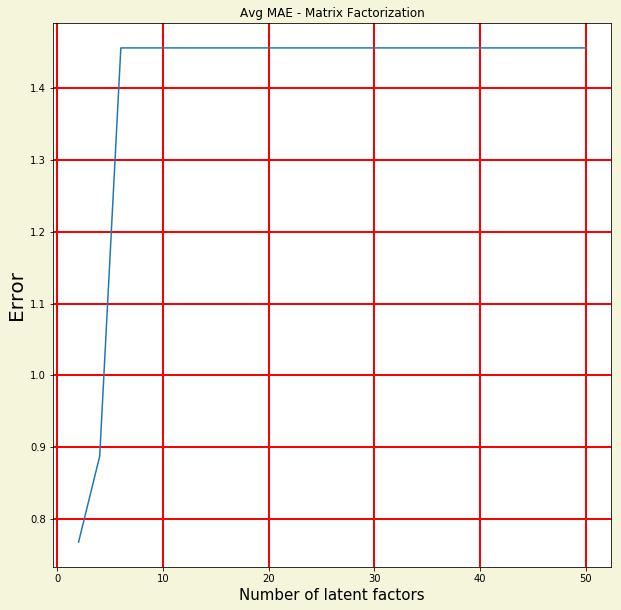

9.5
Minimum average RMSE is  1.0391598215773228  for k =  2
Minimum average MAE is  0.7904707030448994  for k =  2


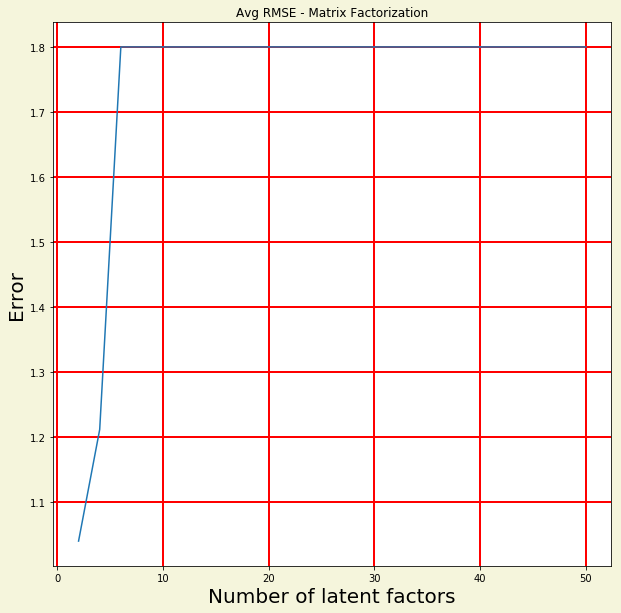

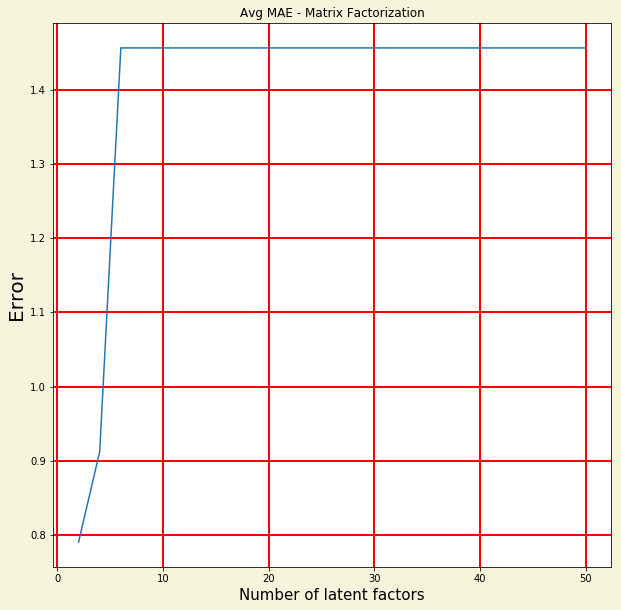

10
Minimum average RMSE is  1.111430234421603  for k =  2
Minimum average MAE is  0.838845628122203  for k =  2


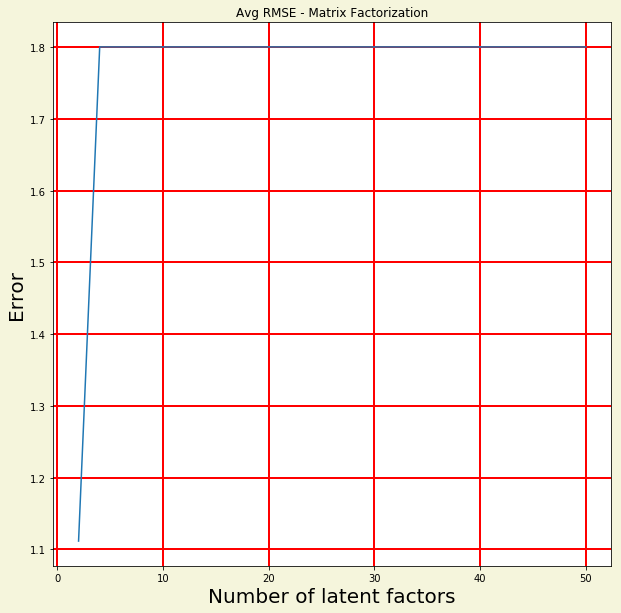

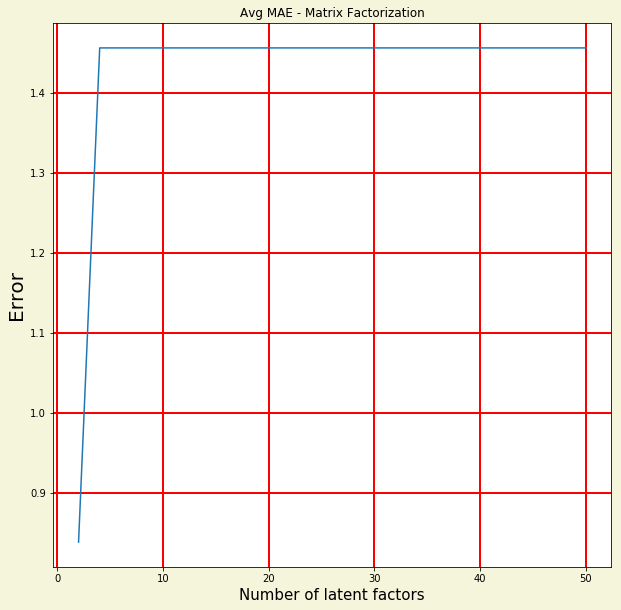

In [26]:
#q24 MF curves and plots
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from sklearn.metrics import roc_curve, auc
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

#del range
range = range(2, 52, 2)
kf = KFold(n_splits=10)

for meanrange in [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6.0 , 6.5, 7.0 , 7.5 ,8.0 ,8.5 ,9.0, 9.5 ,10]:
    print(meanrange)
    avgrmse, avgmae = [], []

    for k in range:
        mf_rmse, mf_mae = [], []
        for trainset, testset in kf.split(mydataset):
            algo = SVD(n_factors=k, init_mean=meanrange)
            algo.fit(trainset)
            pred = algo.test(testset)
            mf_rmse.append(accuracy.rmse(pred, verbose=False))
            mf_mae.append(accuracy.mae(pred, verbose=False))

        avgrmse.append(np.mean(mf_rmse))
        avgmae.append(np.mean(mf_mae))

    print('Minimum average RMSE is ', min(avgrmse), ' for k = ', range[np.argmin(avgrmse)])
    print('Minimum average MAE is ', min(avgmae), ' for k = ', range[np.argmin(avgmae)])
    
    plt.figure(figsize=(10,10),facecolor = 'beige')
    plt.plot(range, avgrmse)
    plt.xlabel('Number of latent factors', fontsize=20)
    plt.ylabel('Error', fontsize=20)
    plt.title("Avg RMSE - Matrix Factorization")
    plt.grid('true',color='red', linestyle='-', linewidth=2)
    plt.show()
   
    plt.figure(figsize=(10,10),facecolor = 'beige')
    plt.plot(range, avgmae)
    plt.xlabel('Number of latent factors', fontsize=15)
    plt.ylabel('Error', fontsize=20)
    plt.title("Avg MAE - Matrix Factorization")
    plt.grid('true',color='red', linestyle='-', linewidth=2)
    plt.show()

In [27]:
#Q25 in word doc from above plot

In [28]:
# q26 svd pop movies
avgrmse = []
del range
range = range(2, 50, 2)
kf = KFold(n_splits=10)

def popmovies(mydataset):
    popmovies_counter = Counter([count[1] for count in mydataset])
    popmovies_dataset = [count for count in mydataset if popmovies_counter[count[1]] > 2]
    return popmovies_dataset

for k in range:
    algo = SVD(n_factors=k, init_mean=0.5)

    svdrmse = []
    for trainset, testset in kf.split(mydataset):
        algo.fit(trainset)
        pred = algo.test(popmovies(testset))
        svdrmse.append(accuracy.rmse(pred, verbose=False))

    avgrmse.append(np.mean(svdrmse))

print('Mini Avg RMSE ', min(avgrmse), ' for k = ', range[np.argmin(avgrmse)])


Mini Avg RMSE  0.8647732549446806  for k =  2


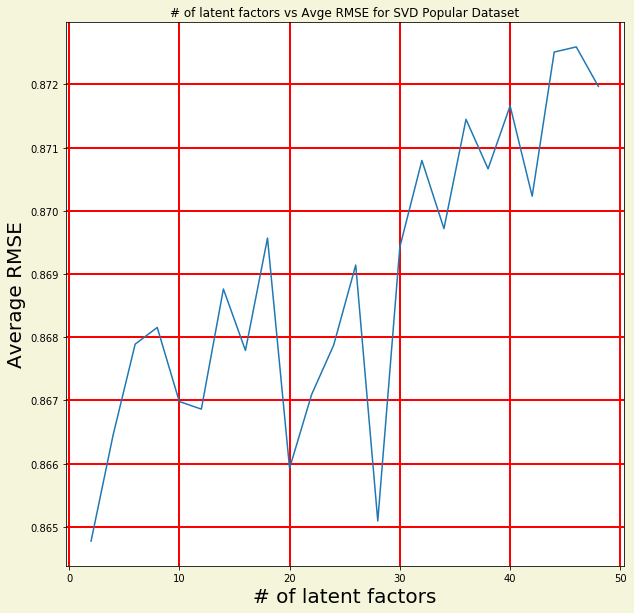

In [29]:
# q26 svd pop movies plot
plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(range, avgrmse)
plt.xlabel('# of latent factors', fontsize=20)
plt.ylabel('Average RMSE', fontsize=20)
plt.title('# of latent factors vs Avge RMSE for SVD Popular Dataset')
plt.grid('true',color='red', linestyle='-', linewidth=2)
plt.show()

In [30]:
# q27 svd unpop movies
avgrmse = []
del range
range = range(2, 52, 2)
kf = KFold(n_splits=10)

def unpopmovies(mydataset):
    unpopmovies_counter = Counter([count[1] for count in mydataset])
    unpopmovies_dataset = [count for count in mydataset if unpopmovies_counter[count[1]] < 2]
    return unpopmovies_dataset

for k in range:
    algo = SVD(n_factors=k, init_mean=0.5)

    svdrmse = []
    for trainset, testset in kf.split(mydataset):
        algo.fit(trainset)
        pred = algo.test(unpopmovies(testset))
        svdrmse.append(accuracy.rmse(pred, verbose=False))

    avgrmse.append(np.mean(svdrmse))

print('Mini Avg RMSE ', min(avgrmse), ' for k = ', range[np.argmin(avgrmse)])


Mini Avg RMSE  0.9645492772348326  for k =  2


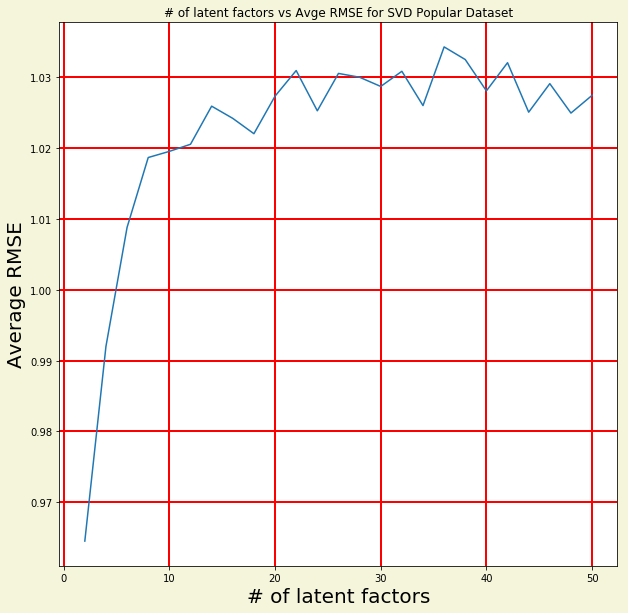

In [31]:
# q27 svd pop movies plot
plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(range, avgrmse)
plt.xlabel('# of latent factors', fontsize=20)
plt.ylabel('Average RMSE', fontsize=20)
plt.title('# of latent factors vs Avge RMSE for SVD Popular Dataset')
plt.grid('true',color='red', linestyle='-', linewidth=2)
plt.show()

In [32]:
# q28 svd highvar movies
avgrmse = []
del range
range = range(2, 52, 2)
kf = KFold(n_splits=10)

def highvar(mydataset):
    movielist = defaultdict(list)
    for count in mydataset:
        movielist[count[1]].append(count[2])
    highvar_movies = [count for count in mydataset if len(movielist[count[1]]) >= 5 and np.var(movielist[count[1]]) >= 2.0]
    return highvar_movies

for k in range:
    algo = SVD(n_factors=k, init_mean=0.5)

    svdrmse = []
    for trainset, testset in kf.split(mydataset):
        algo.fit(trainset)
        pred = algo.test(highvar(testset))
        svdrmse.append(accuracy.rmse(pred, verbose=False))

    avgrmse.append(np.mean(svdrmse))

print('Mini Avg RMSE ', min(avgrmse), ' for k = ', range[np.argmin(avgrmse)])

Mini Avg RMSE  1.4091562408850309  for k =  42


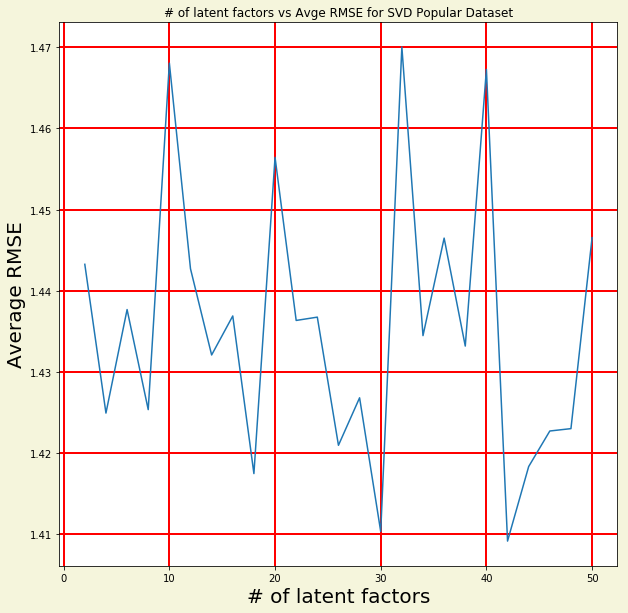

In [33]:
# q28 svd highvar movies plot
plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(range, avgrmse)
plt.xlabel('# of latent factors', fontsize=20)
plt.ylabel('Average RMSE', fontsize=20)
plt.title('# of latent factors vs Avge RMSE for SVD Popular Dataset')
plt.grid('true',color='red', linestyle='-', linewidth=2)
plt.show()

ROC Curve with threshold =  2.5


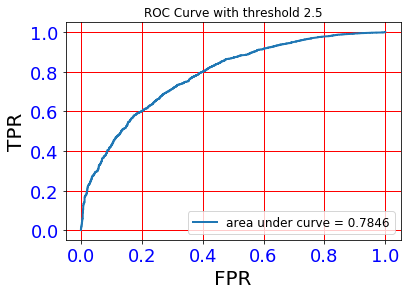

ROC Curve with threshold =  3


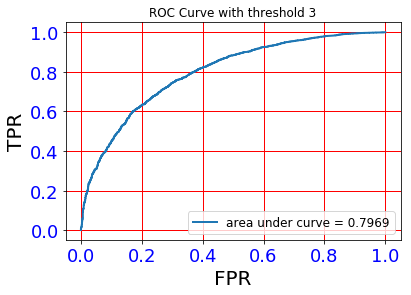

ROC Curve with threshold =  3.5


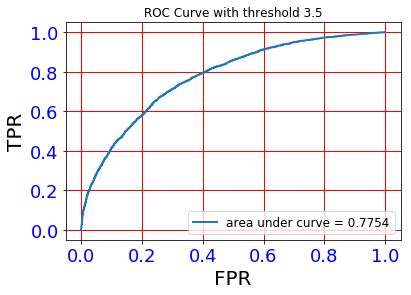

ROC Curve with threshold =  4


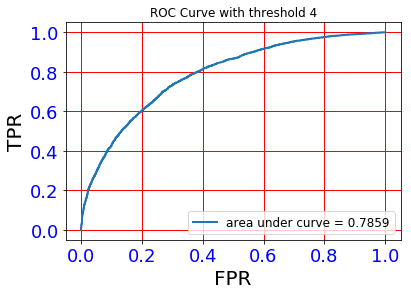

In [34]:
#q29 MF ROC curves
from surprise.model_selection import cross_validate, train_test_split, KFold
import pandas as pd
from surprise import accuracy, Reader, Dataset
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
from sklearn.metrics import roc_curve, auc

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

opt_lf = 20 #optimum latent factors
trainset, testset = train_test_split(mydataset, test_size=.10)

algo = SVD(n_factors=opt_lf)
algo.fit(trainset)
predictions = algo.test(testset)

actual = [i.r_ui for i in predictions]
predicted = [i.est for i in predictions]

thresholds = [2.5, 3, 3.5, 4]

for val in thresholds:
    print("ROC Curve with threshold = ", val)
    y_test = np.array(actual) >= val
    y_score = predicted
    fpr, tpr, _ = roc_curve(y_test, y_score)

    plt.figure()
    plt.plot(fpr, tpr, lw=2, label='area under curve = %0.4f' % auc(fpr,tpr))
    plt.grid('true',color='red', linestyle='-', linewidth=1)
    plt.xlabel('FPR',fontsize=20)
    plt.ylabel('TPR',fontsize=20)
    plt.legend(loc ='best',fontsize=12)
    plt.title('ROC Curve with threshold ' + str(val))
    plt.xticks(fontsize=18,color='blue')
    plt.yticks(fontsize=18,color='blue')
    plt.show()

In [35]:
#q30
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.matrix_factorization import NMF
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from collections import defaultdict
from sklearn.metrics import roc_curve, auc
from surprise.model_selection import train_test_split
from surprise import Dataset
from surprise import Reader
from surprise.prediction_algorithms.knns import KNNWithMeans

rankings = pd.read_csv('ratings.csv')
dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)
ratings = dataframe.groupby(['userID'])['rating'].mean().tolist()

del range
def naivepred(mydataset):
    pred = [ratings[mydataset[i][0] - 1] for i in range(len(mydataset))]
    return pred

rmse = []
kfold = KFold(n_splits=10)
for trainset, testset in kfold.split(mydataset):
    act_pred = naivepred(testset)
    act_true = [testset[i][2] for i in range(len(testset))]
    rmse.append(mean_squared_error(act_pred, act_true))
avgrmse = np.mean(rmse)
print('Avg RMSE with 10 fold cross val and using Naive collab filter is %0.4f' % avgrmse)


Avg RMSE with 10 fold cross val and using Naive collab filter is 0.9129


In [36]:
#q31

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def popmovies(mydataset):
    popmovies_counter = Counter([count[1] for count in mydataset])
    popmovies_dataset = [count for count in mydataset if popmovies_counter[count[1]] > 2]
    return popmovies_dataset


rmse = []
kfold = KFold(n_splits=10)
for trainset, testset in kfold.split(mydataset):
    testset = popmovies(testset)
    act_pred = naivepred(testset)
    act_true = [testset[i][2] for i in range(len(testset))]
    rmse.append(mean_squared_error(act_pred, act_true))
avgrmse = np.mean(rmse)
print('Avg RMSE with 10 fold cross val and using Naive collab filter for pop movies is %0.4f' % avgrmse)

Avg RMSE with 10 fold cross val and using Naive collab filter for pop movies is 0.8835


In [37]:
#q32

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def unpopmovies(mydataset):
    unpopmovies_counter = Counter([count[1] for count in mydataset])
    unpopmovies_dataset = [count for count in mydataset if unpopmovies_counter[count[1]] < 2]
    return unpopmovies_dataset


rmse = []
kfold = KFold(n_splits=10)
for trainset, testset in kfold.split(mydataset):
    testset = unpopmovies(testset)
    act_pred = naivepred(testset)
    act_true = [testset[i][2] for i in range(len(testset))]
    rmse.append(mean_squared_error(act_pred, act_true))
avgrmse = np.mean(rmse)
print('Avg RMSE with 10 fold cross val and using Naive collab filter for unpop movies is %0.4f' % avgrmse)

Avg RMSE with 10 fold cross val and using Naive collab filter for unpop movies is 0.9884


In [38]:
#q33


dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

def highvar(mydataset):
    movielist = defaultdict(list)
    for count in mydataset:
         movielist[count[1]].append(count[2])
    highvar_movies = [count for count in mydataset if len(movielist[count[1]]) >= 5 and np.var(movielist[count[1]]) >= 2.0]
    return highvar_movies


rmse = []
kfold = KFold(n_splits=10)
for trainset, testset in kfold.split(mydataset):
    testset = highvar(testset)
    act_pred = naivepred(testset)
    act_true = [testset[i][2] for i in range(len(testset))]
    rmse.append(mean_squared_error(act_pred, act_true))
avgrmse = np.mean(rmse)
print('Avg RMSE with 10 fold cross val and using Naive collab filter for highvar movies is %0.4f' % avgrmse)

Avg RMSE with 10 fold cross val and using Naive collab filter for highvar movies is 2.0284


Algorithm is  <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x0000018A45C78828>
Computing the pearson similarity matrix...
Done computing similarity matrix.
Algorithm is  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x0000018A45C78B00>
Algorithm is  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000018A51130E10>


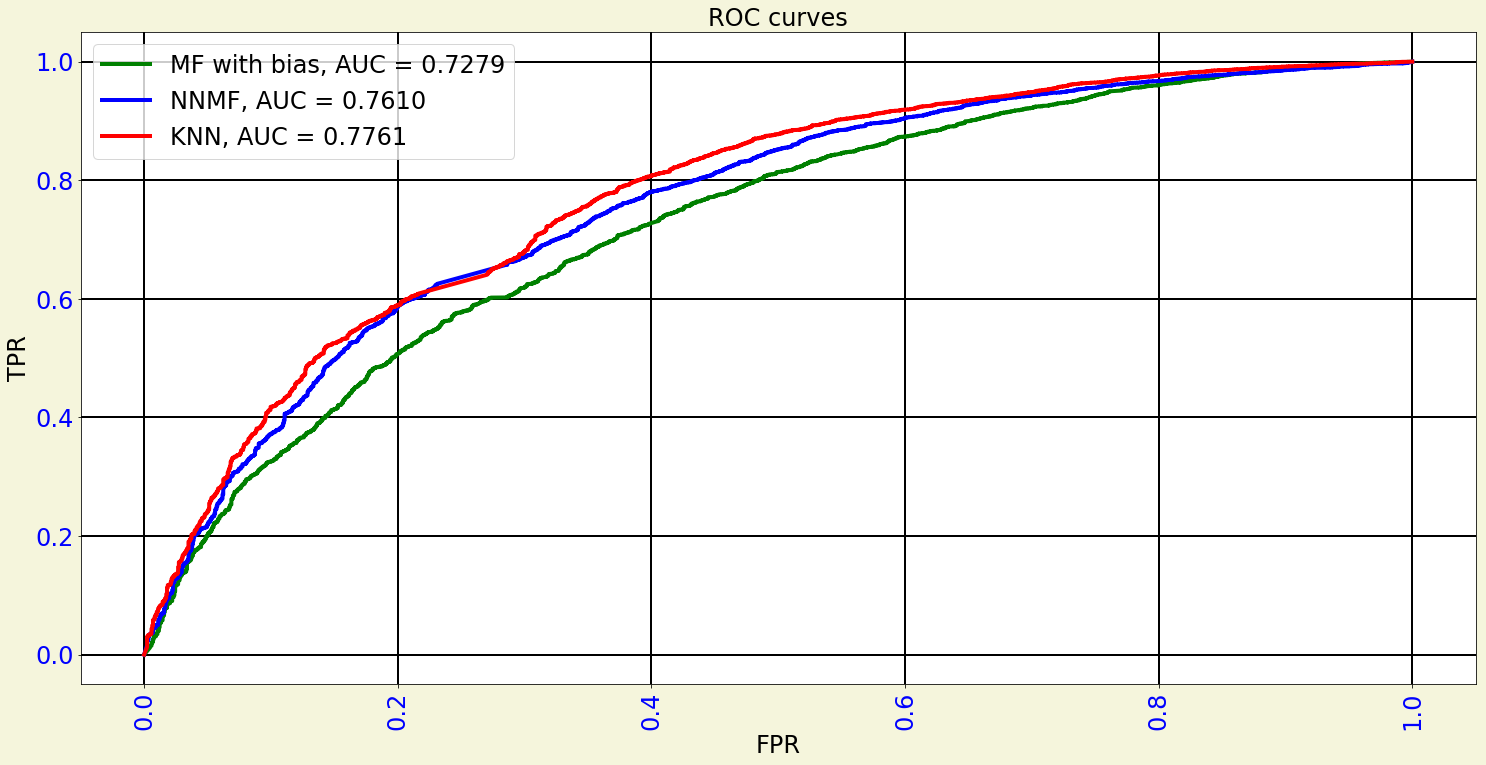

In [39]:
#q34
train_set, test_set = train_test_split(mydataset, test_size=0.1, random_state=0)
threshold = 3 
algos = [KNNWithMeans(k=20, sim_options = {'name':'pearson'}), NMF(n_factors = 20),
                      SVD(n_factors=20, init_mean = 2.5)]
algo_fpr,algo_tpr,algo_auc = [],[],[]
for algo in algos:
    print('Algorithm is ', algo)
    algo.fit(train_set)
    predictions = algo.test(test_set)
    pred_est = np.array([i.est for i in predictions])
    actual_ratings = np.array([i.r_ui for i in predictions])
    y_score = pred_est
    y_true = actual_ratings>=threshold
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    algo_fpr.append(fpr)
    algo_tpr.append(tpr)
    algo_auc.append(roc_auc)
    
plt.figure(figsize=(25,12),facecolor = 'beige')
plt.plot(algo_fpr[2], algo_tpr[2], lw=4, label='MF with bias, AUC = %0.4f' %algo_auc[2],color='green')
plt.plot(algo_fpr[1], algo_tpr[1], lw=4, label='NNMF, AUC = %0.4f' %algo_auc[1],color='blue')
plt.plot(algo_fpr[0], algo_tpr[0], lw=4, label='KNN, AUC = %0.4f' %algo_auc[0],color='red')
plt.grid('true',color='black', linestyle='-', linewidth=2)

plt.xlabel('FPR',fontsize=24)
plt.ylabel('TPR',fontsize=24)
plt.legend(loc ='best',fontsize=24)
plt.title('ROC curves',fontsize=24)
plt.xticks(fontsize=24,rotation="vertical",color='blue')
plt.yticks(fontsize=24,color='blue')
plt.show()


In [40]:
#q36 / 37 / 38 
#Plot average precision (Y-axis) against t (X-axis) for the rank-ing obtained using k-NN collaborative ﬁlter predictions. 
#Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). 
#Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. 

# get predictions first and then do sort after sort do KNN means
def top10pred(pred, th=10):
    # First map the predictions to each user.
    topn = defaultdict(list)
    for userid, iid, true_r, estimation, _ in pred:
        topn[userid].append((iid, estimation, true_r))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for userid, ratings in topn.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topn[userid] = ratings[:th]

    return topn


def func36(pred, k=10, th=3.5):
    thlist = defaultdict(list)
    for userid, _, true_r, estimation, _ in pred:
        thlist[userid].append((estimation, true_r))
    precision = dict()
    recall = dict()
    for userid, ratings in thlist.items():
        ratings.sort(key=lambda x: x[0], reverse=True)
        fnone = sum((true_r >= th) for (_, true_r) in ratings)
        fntwo= sum((estimation >= th) for (estimation, _) in ratings[:k])
        fnone_fntwo  = sum(((true_r >= th) and (estimation >= th))
                              for (estimation, true_r) in ratings[:k])
        precision[userid] = fnone_fntwo  / fntwo if fntwo != 0 else 1
        recall[userid] = fnone_fntwo  / fnone if fnone != 0 else 1
    return precision, recall

In [41]:
#q36 
#Plot average precision (Y-axis) against t (X-axis) for the rank-ing obtained using k-NN collaborative ﬁlter predictions. 
#Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). 
#Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. 

from surprise.prediction_algorithms.matrix_factorization import SVD, NMF 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from sklearn.metrics import roc_curve, auc
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise import KNNWithMeans

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

train_set, test_set = train_test_split(mydataset, test_size=0.1, random_state=0)
algo = KNNWithMeans(k=20, sim_options={'name': 'pearson'})
algo.fit(train_set)
pred = algo.test(test_set)
top_recos = top10pred(pred)


avgprec = []
avgrec = []
varprecision,varrecall = [], []
kf = KFold(n_splits=10)

# k  = 20 is what we found in question 11
algo = KNNWithMeans(k=20, sim_options = {'name':'pearson'}) 
#maze = 3

for var in range(1, 26):
    varprecision,varrecall = [], []
    for trainset, testset in kf.split(mydataset):
        algo.fit(trainset)
        pred = algo.test(testset)
        precision, recall = func36(pred, k=var, th=3)
        varprecision.append((sum(prec for prec in precision.values()) / len(precision)))
        varrecall.append(sum(rec for rec in recall.values()) / len(recall))
    avgprec.append(np.mean(varprecision))
    avgrec.append(np.mean(varrecall))    



Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

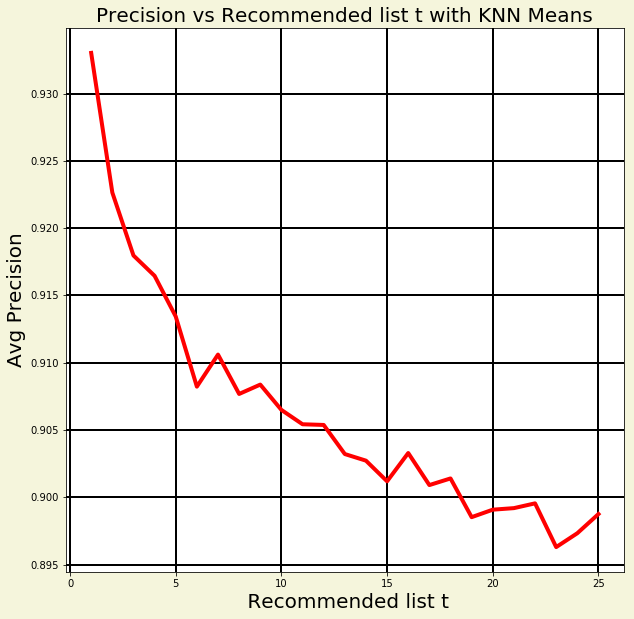

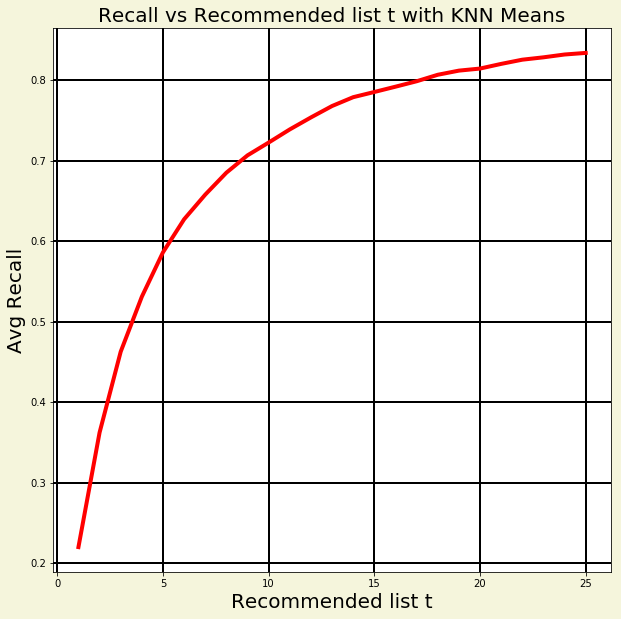

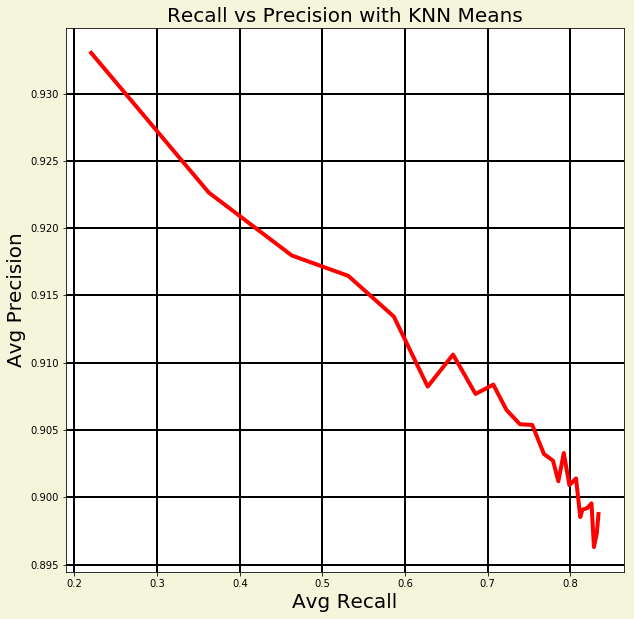

In [42]:
#plot 36
%matplotlib inline
from matplotlib import pyplot as plt

plotrange = range(1,26)
plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(plotrange, avgprec,lw=4,color='red')
plt.xlabel(' Recommended list t', fontsize=20)
plt.ylabel('Avg Precision', fontsize=20)
plt.title("Precision vs Recommended list t with KNN Means",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(plotrange, avgrec,lw=4,color='red')
plt.xlabel('Recommended list t', fontsize=20)
plt.ylabel('Avg Recall', fontsize=20)
plt.title("Recall vs Recommended list t with KNN Means",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(avgrec, avgprec,lw=4,color='red')
plt.xlabel('Avg Recall', fontsize=20)
plt.ylabel('Avg Precision', fontsize=20)
plt.title("Recall vs Precision with KNN Means",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

In [43]:
#q36 / 37 / 38 
#Plot average precision (Y-axis) against t (X-axis) for the rank-ing obtained using k-NN collaborative ﬁlter predictions. 
#Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). 
#Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. 

# get predictions first and then do sort after sort do KNN means
def top10pred(pred, th=10):
    # First map the predictions to each user.
    topn = defaultdict(list)
    for userid, iid, true_r, estimation, _ in pred:
        topn[userid].append((iid, estimation, true_r))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for userid, ratings in topn.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topn[userid] = ratings[:th]

    return topn


def func36(pred, k=10, th=3.5):
    thlist = defaultdict(list)
    for userid, _, true_r, estimation, _ in pred:
        thlist[userid].append((estimation, true_r))
    precision = dict()
    recall = dict()
    for userid, ratings in thlist.items():
        ratings.sort(key=lambda x: x[0], reverse=True)
        fnone = sum((true_r >= th) for (_, true_r) in ratings)
        fntwo= sum((estimation >= th) for (estimation, _) in ratings[:k])
        fnone_fntwo  = sum(((true_r >= th) and (estimation >= th))
                              for (estimation, true_r) in ratings[:k])
        precision[userid] = fnone_fntwo  / fntwo if fntwo != 0 else 1
        recall[userid] = fnone_fntwo  / fnone if fnone != 0 else 1
    return precision, recall


In [44]:
#Q 37

from surprise.prediction_algorithms.matrix_factorization import SVD, NMF 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from sklearn.metrics import roc_curve, auc
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise import KNNWithMeans

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

avgprec = []
avgrec = []
varprecision,varrecall = [], []
kf = KFold(n_splits=10)
# k  = 20 is what we found in question 11
algo = NMF(n_factors=20) 
#maze = 3

for var in range(1, 26):
    varprecision,varrecall = [], []
    for trainset, testset in kf.split(mydataset):
        algo.fit(trainset)
        pred = algo.test(testset)
        precision, recall = func36(pred, k=var, th=3)
        varprecision.append((sum(prec for prec in precision.values()) / len(precision)))
        varrecall.append(sum(rec for rec in recall.values()) / len(recall))
    avgprec.append(np.mean(varprecision))
    avgrec.append(np.mean(varrecall))    


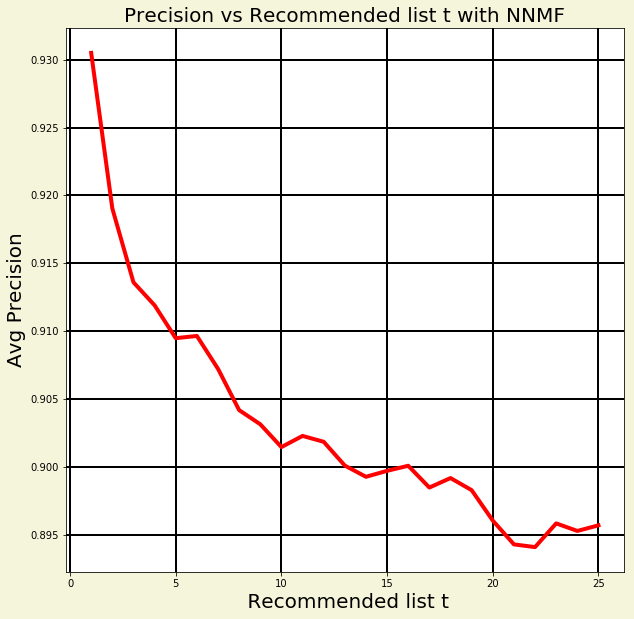

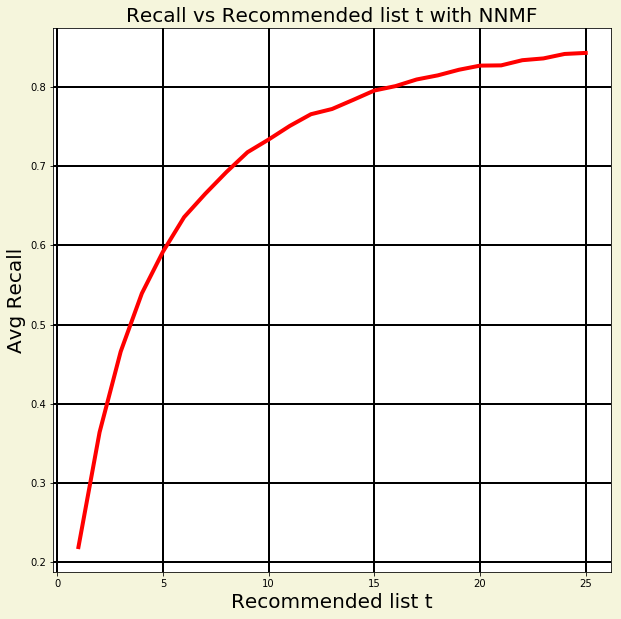

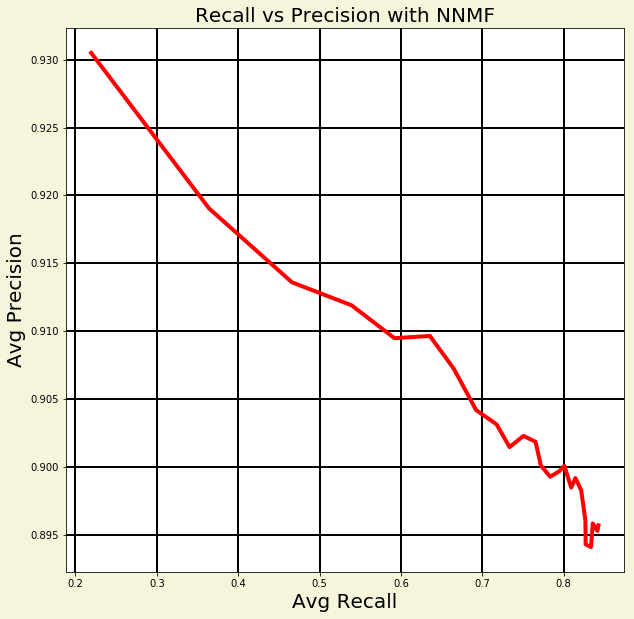

In [45]:
#plot 37
%matplotlib inline
from matplotlib import pyplot as plt

plotrange = range(1,26)
plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(plotrange, avgprec,lw=4,color='red')
plt.xlabel(' Recommended list t', fontsize=20)
plt.ylabel('Avg Precision', fontsize=20)
plt.title("Precision vs Recommended list t with NNMF",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(plotrange, avgrec,lw=4,color='red')
plt.xlabel('Recommended list t', fontsize=20)
plt.ylabel('Avg Recall', fontsize=20)
plt.title("Recall vs Recommended list t with NNMF",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(avgrec, avgprec,lw=4,color='red')
plt.xlabel('Avg Recall', fontsize=20)
plt.ylabel('Avg Precision', fontsize=20)
plt.title("Recall vs Precision with NNMF",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

In [46]:
# 38 
#Plot average precision (Y-axis) against t (X-axis) for the rank-ing obtained using k-NN collaborative ﬁlter predictions. 
#Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). 
#Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. 

#q38

#Q 38
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from sklearn.metrics import roc_curve, auc
from surprise import accuracy, Reader, Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise import KNNWithMeans

dataframe = pd.DataFrame({'itemID': list(rankings.movieId), 'userID': list(rankings.userId), 'rating': list(rankings.rating)})
moviescales = Reader(rating_scale=(0.5, 5.0))
mydataset = Dataset.load_from_df(dataframe[['userID', 'itemID', 'rating']], moviescales)

# get predictions first and then do sort after sort do KNN means
def top10pred(pred, th=10):
    topn = defaultdict(list)
    for userid, iid, true_r, estimation, _ in pred:
        topn[userid].append((iid, estimation, true_r))
    for userid, ratings in topn.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topn[userid] = ratings[:th]

    return topn

train_set, test_set = train_test_split(mydataset, test_size=0.1, random_state=0)
algo = KNNWithMeans(k=20, sim_options={'name': 'pearson'})
algo.fit(train_set)
pred = algo.test(test_set)
top_recos = top10pred(pred)

def func36(pred, k=10, th=3.5):
    thlist = defaultdict(list)
    for userid, _, true_r, estimation, _ in pred:
        thlist[userid].append((estimation, true_r))
    precision = dict()
    recall = dict()
    for userid, ratings in thlist.items():
        ratings.sort(key=lambda x: x[0], reverse=True)
        fnone = sum((true_r >= th) for (_, true_r) in ratings)
        fntwo= sum((estimation >= th) for (estimation, _) in ratings[:k])
        fnone_fntwo  = sum(((true_r >= th) and (estimation >= th))
                              for (estimation, true_r) in ratings[:k])
        precision[userid] = fnone_fntwo  / fntwo if fntwo != 0 else 1
        recall[userid] = fnone_fntwo  / fnone if fnone != 0 else 1
    return precision, recall

precision 
recall

Computing the pearson similarity matrix...
Done computing similarity matrix.


{2: 0.8888888888888888,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 0.8888888888888888,
 8: 1.0,
 9: 1.0,
 11: 1.0,
 12: 0.0,
 13: 0.9090909090909091,
 14: 0.5,
 15: 0.16129032258064516,
 16: 1.0,
 17: 0.7857142857142857,
 18: 1.0,
 19: 0.631578947368421,
 20: 0.8888888888888888,
 21: 0.8461538461538461,
 22: 0.8461538461538461,
 23: 0.41818181818181815,
 24: 0.0,
 25: 0.6666666666666666,
 26: 0.8666666666666667,
 27: 1.0,
 28: 1.0,
 29: 1.0,
 30: 0.2608695652173913,
 31: 0.875,
 32: 0.8571428571428571,
 33: 0.8,
 34: 0.9285714285714286,
 35: 1,
 36: 0.875,
 37: 1.0,
 38: 1.0,
 39: 1.0,
 40: 1.0,
 41: 0.85,
 42: 1.0,
 43: 0.5555555555555556,
 44: 1.0,
 45: 1,
 46: 1.0,
 47: 1.0,
 48: 0.46296296296296297,
 49: 1.0,
 50: 1.0,
 51: 1.0,
 52: 1.0,
 53: 0.25,
 54: 0.6,
 55: 1.0,
 56: 0.5675675675675675,
 57: 1.0,
 58: 1.0,
 59: 1.0,
 60: 1.0,
 61: 0.75,
 62: 1.0,
 63: 1.0,
 64: 1.0,
 65: 1.0,
 66: 1.0,
 67: 1.0,
 68: 0.9090909090909091,
 69: 1.0,
 70: 0.9166666666666666,
 71: 1.0,
 72: 1.0,
 73

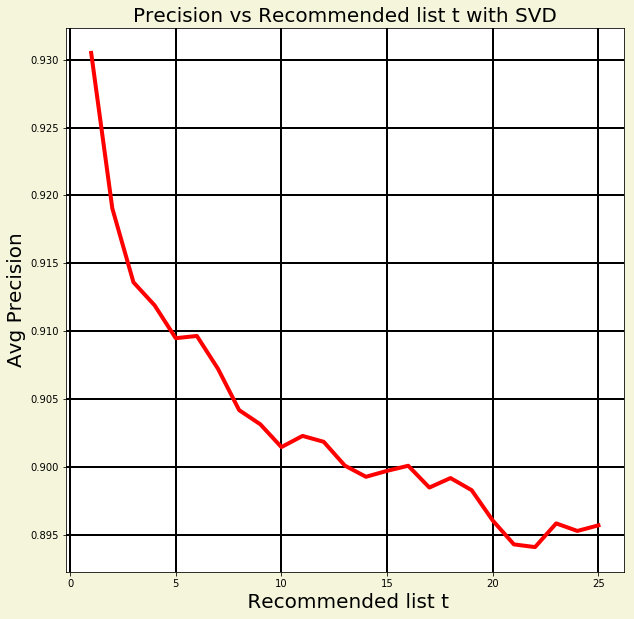

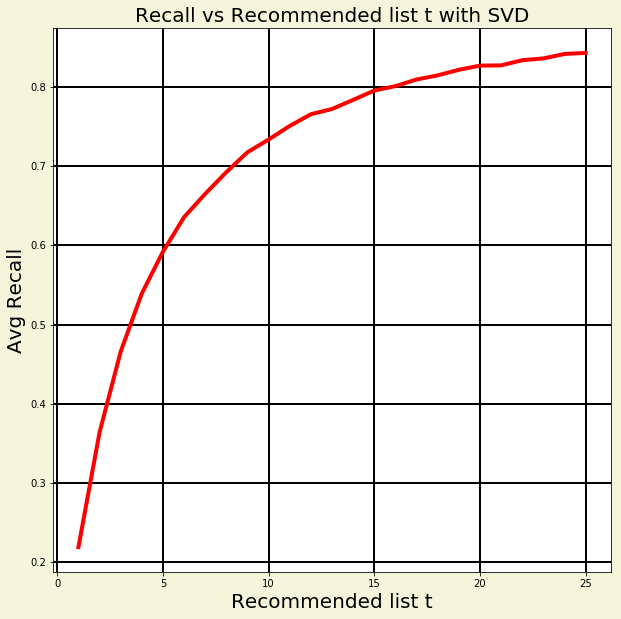

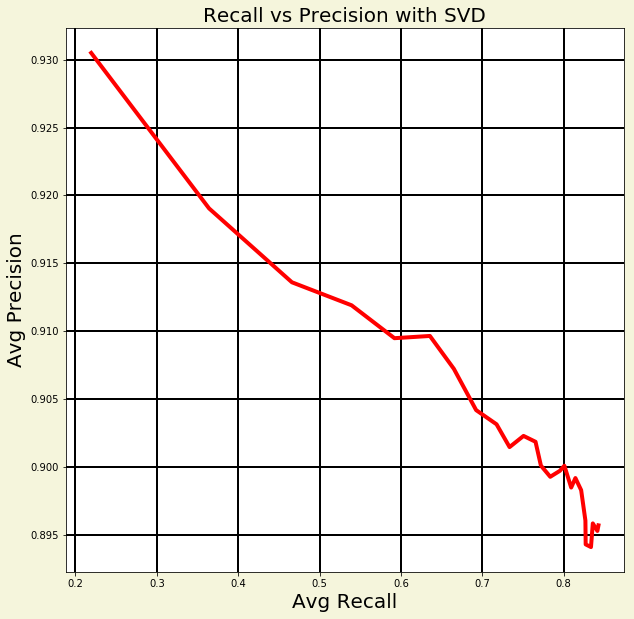

In [47]:
# 38 
from matplotlib import pyplot as plt

plotrange = range(1,26)
plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(plotrange, avgprec,lw=4,color='red')
plt.xlabel(' Recommended list t', fontsize=20)
plt.ylabel('Avg Precision', fontsize=20)
plt.title("Precision vs Recommended list t with SVD",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(plotrange, avgrec,lw=4,color='red')
plt.xlabel('Recommended list t', fontsize=20)
plt.ylabel('Avg Recall', fontsize=20)
plt.title("Recall vs Recommended list t with SVD",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(avgrec, avgprec,lw=4,color='red')
plt.xlabel('Avg Recall', fontsize=20)
plt.ylabel('Avg Precision', fontsize=20)
plt.title("Recall vs Precision with SVD",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.show()

In [48]:
#39 last question

kf = KFold(n_splits=5)
algos = [KNNWithMeans(k=20, sim_options = {'name':'pearson'}), NMF(n_factors = 20),
                      SVD(n_factors=20, init_mean = 2.5)]
threshold = 3
algo_prec, algo_rec = [], [] 
for algo in algos:
    avg_prec, avg_rec = [], []
    for t in range(1,26):
        t_prec, t_rec = [], []
        for trainset, testset in kf.split(mydataset):
            algo.fit(trainset)
            predictions = algo.test(testset)
            precisions, recalls = func36(predictions, k=t, th=threshold)
            t_prec.append((sum(prec for prec in precisions.values()) / len(precisions)))
            t_rec.append(sum(rec for rec in recalls.values()) / len(recalls))
        avg_prec.append(np.mean(t_prec))
        avg_rec.append(np.mean(t_rec)) 
    algo_prec.append(avg_prec)
    algo_rec.append(avg_rec)
    


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

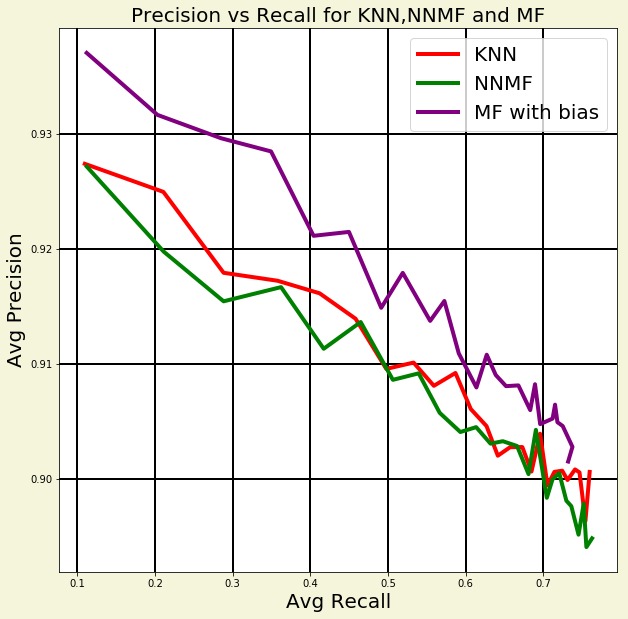

In [49]:
#q39
plt.figure(figsize=(10,10),facecolor = 'beige')
plt.plot(algo_rec[0], algo_prec[0], lw = 4, label = 'KNN',color ='red')
plt.plot(algo_rec[1], algo_prec[1], lw=4, label = 'NNMF',color='green')
plt.plot(algo_rec[2], algo_prec[2], lw = 4, label = 'MF with bias',color='purple')
plt.xlabel('Avg Recall', fontsize=20)
plt.ylabel('Avg Precision', fontsize=20)
plt.title("Precision vs Recall for KNN,NNMF and MF",fontsize=20)
plt.grid('true',color='black', linestyle='-', linewidth=2)
plt.legend(fontsize=20)
plt.show()